In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_text as pt
from IPython.display import Image
import time
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#display all columns
pd.set_option('display.max_columns', None)

#display all row
pd.set_option('display.max_rows', None)

In [3]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [4]:
df_loans = pd.read_csv('D:\Dataset\IDX_Final_Project\loan_data_2007_2014.csv')

In [5]:
df_loans.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [6]:
df_loans.isna().sum().sum()

9776227

In [7]:
# Separate categorical and numerical columns
col_cat = df_loans.select_dtypes(include='object')
col_num = df_loans.select_dtypes(exclude='object')

In [8]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [395]:
df_loans['policy_code'].unique()

array([1], dtype=int64)

In [9]:
col_num.describe().T

count          mean           std       min  \
Unnamed: 0                   466285.0  2.331420e+05  1.346050e+05      0.00   
id                           466285.0  1.307973e+07  1.089371e+07  54734.00   
member_id                    466285.0  1.459766e+07  1.168237e+07  70473.00   
loan_amnt                    466285.0  1.431728e+04  8.286509e+03    500.00   
funded_amnt                  466285.0  1.429180e+04  8.274371e+03    500.00   
funded_amnt_inv              466285.0  1.422233e+04  8.297638e+03      0.00   
int_rate                     466285.0  1.382924e+01  4.357587e+00      5.42   
installment                  466285.0  4.320612e+02  2.434855e+02     15.67   
annual_inc                   466281.0  7.327738e+04  5.496357e+04   1896.00   
dti                          466285.0  1.721876e+01  7.851121e+00      0.00   
delinq_2yrs                  466256.0  2.846784e-01  7.973651e-01      0.00   
inq_last_6mths               466256.0  8.047446e-01  1.091598e+00      0.00   
mths_since_last_delinq       215934.0  3.410443e+01  2.177849e+01      0.00   
mths_since_last_record        62638.0  7.430601e+01  3.035765e+01      0.00   
open_acc                     466256.0  1.118707e+01  4.987526e+00      0.00   
pub_rec                      466256.0  1.605642e-01  5.108626e-01      0.00   
revol_bal                    466285.0  1.623020e+04  2.067625e+04      0.00   
revol_util                   465945.0  5.617695e+01  2.373263e+01      0.00   
total_acc                    466256.0  2.506443e+01  1.160014e+01      1.00   
out_prncp                    466285.0  4.410062e+03  6.355079e+03      0.00   
out_prncp_inv                466285.0  4.408452e+03  6.353198e+03      0.00   
total_pymnt                  466285.0  1.154069e+04  8.265627e+03      0.00   
total_pymnt_inv              466285.0  1.146989e+04  8.254158e+03      0.00   
total_rec_prncp              466285.0  8.866015e+03  7.031688e+03      0.00   
total_rec_int                466285.0  2.588677e+03  2.483810e+03      0.00   
total_rec_late_fee           466285.0  6.501292e-01  5.265730e+00      0.00   
recoveries                   466285.0  8.534421e+01  5.522161e+02      0.00   
collection_recovery_fee      466285.0  8.961534e+00  8.549144e+01      0.00   
last_pymnt_amnt              466285.0  3.123914e+03  5.554737e+03      0.00   
collections_12_mths_ex_med   466140.0  9.085253e-03  1.086484e-01      0.00   
mths_since_last_major_derog   98974.0  4.285255e+01  2.166259e+01      0.00   
policy_code                  466285.0  1.000000e+00  0.000000e+00      1.00   
annual_inc_joint                  0.0           NaN           NaN       NaN   
dti_joint                         0.0           NaN           NaN       NaN   
verification_status_joint         0.0           NaN           NaN       NaN   
acc_now_delinq               466256.0  4.002093e-03  6.863680e-02      0.00   
tot_coll_amt                 396009.0  1.919135e+02  1.463021e+04      0.00   
tot_cur_bal                  396009.0  1.388017e+05  1.521147e+05      0.00   
open_acc_6m                       0.0           NaN           NaN       NaN   
open_il_6m                        0.0           NaN           NaN       NaN   
open_il_12m                       0.0           NaN           NaN       NaN   
open_il_24m                       0.0           NaN           NaN       NaN   
mths_since_rcnt_il                0.0           NaN           NaN       NaN   
total_bal_il                      0.0           NaN           NaN       NaN   
il_util                           0.0           NaN           NaN       NaN   
open_rv_12m                       0.0           NaN           NaN       NaN   
open_rv_24m                       0.0           NaN           NaN       NaN   
max_bal_bc                        0.0           NaN           NaN       NaN   
all_util                          0.0           NaN           NaN       NaN   
total_rev_hi_lim             396009.0  3.037909e+04  3.724713e+04      0.00   
inq

In [10]:
col_cat.describe().T

count  unique  \
term                 466285       2   
grade                466285       7   
sub_grade            466285      35   
emp_title            438697  205475   
emp_length           445277      11   
home_ownership       466285       6   
verification_status  466285       3   
issue_d              466285      91   
loan_status          466285       9   
pymnt_plan           466285       2   
url                  466285  466285   
desc                 125981  124435   
purpose              466285      14   
title                466264   63098   
zip_code             466285     888   
addr_state           466285      50   
earliest_cr_line     466256     664   
initial_list_status  466285       2   
last_pymnt_d         465909      98   
next_pymnt_d         239071     100   
last_credit_pull_d   466243     103   
application_type     466285       1   

                                                                   top    freq  
term                                                         36 months  337953  
grade                                                                B  136929  
sub_grade                                                           B3   31686  
emp_title                                                      Teacher    5399  
emp_length                                                   10+ years  150049  
home_ownership                                                MORTGAGE  235875  
verification_status                                           Verified  168055  
issue_d                                                         Oct-14   38782  
loan_status                                                    Current  224226  
pymnt_plan                                                           n  466276  
url                  https://www.lendingclub.com/browse/loanDetail....       1  
desc                                                                       234  
purpose                                             debt_consolidation  274195  
title                                               Debt consolidation  164075  
zip_code                                                         945xx    5304  
addr_state                                                          CA   71450  
earliest_cr_line                                                Oct-00    3674  
initial_list_status                                                  f  303005  
last_pymnt_d                                                    Jan-16  179620  
next_pymnt_d                                                    Feb-16  208393  
last_credit_pull_d                                              Jan-16  327699  
application_type                                            INDIVIDUAL  466285

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [15]:
df_loans2 = df_loans.copy()
df_loans2.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [392]:
col_num_temp = col_num.columns
col_cat_temp = col_cat.columns

print(len(col_num_temp))
print(len(col_cat_temp))

32
22


In [390]:
print(len(list_temp))

76


In [350]:
df_loans3 = df_loans.copy()

In [378]:
list_cat = df_loans3.select_dtypes(include=['object'])
list_temp_cat = list_cat.columns

for val in list_temp_cat:
    unique = len(df_loans3[val].unique())
    if unique > 2:
        df_loans3[val] = label_encoder.fit_transform(df_loans3[val])

IndexError: index 49 is out of bounds for axis 0 with size 49

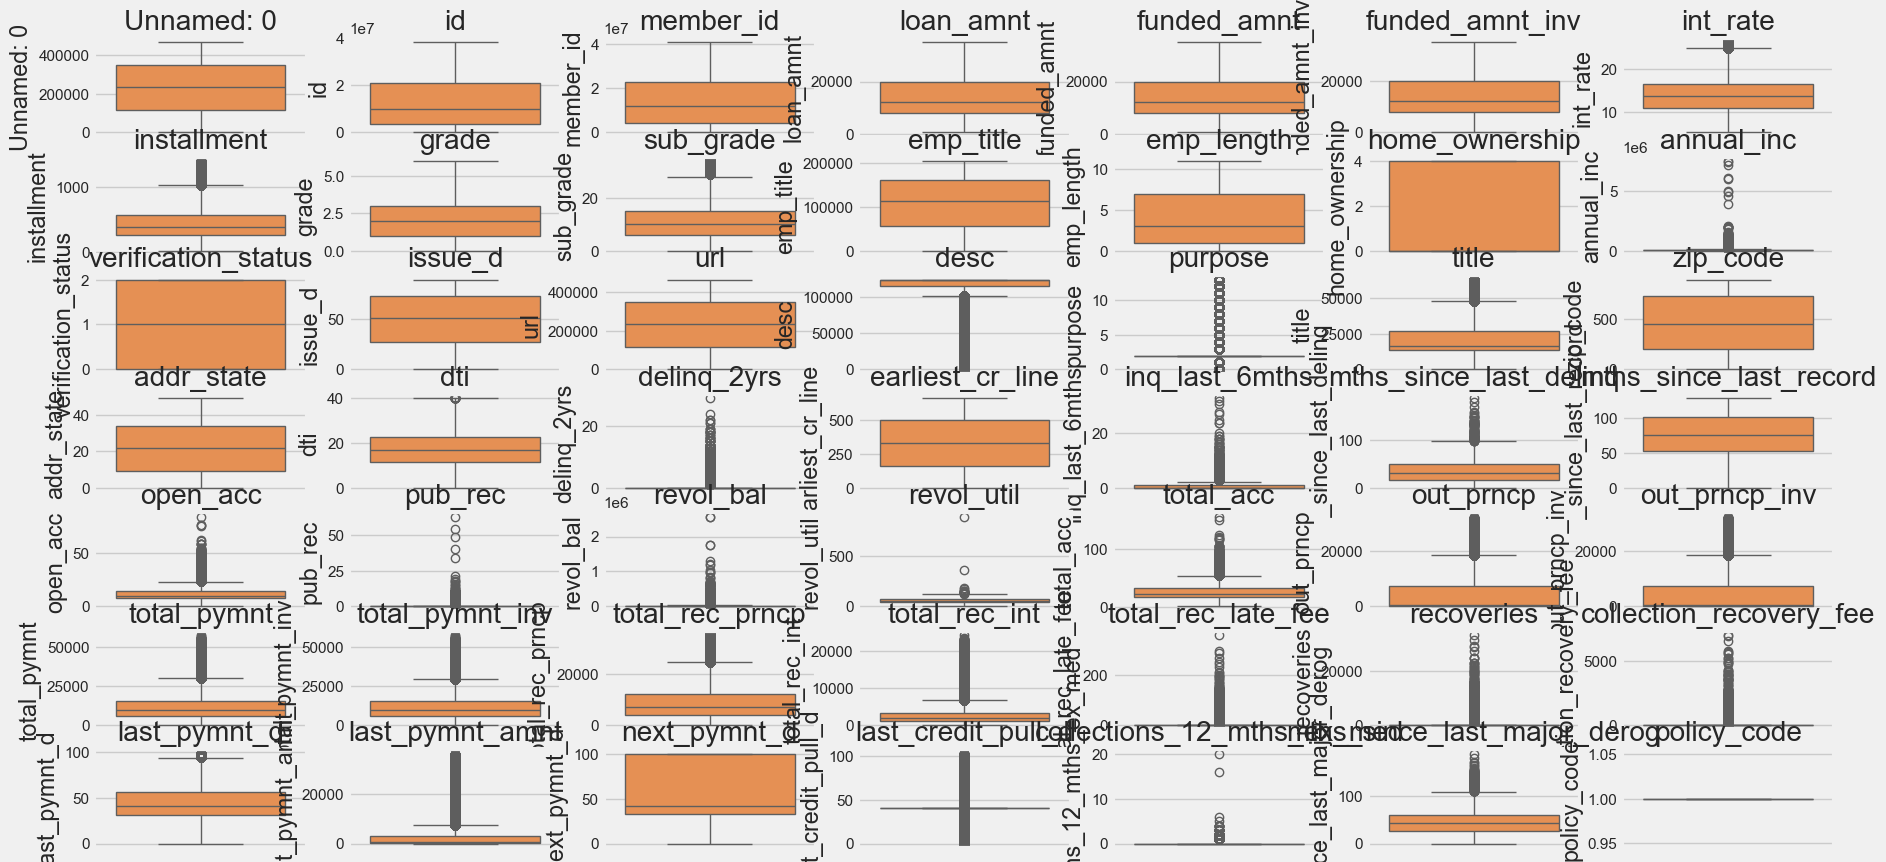

In [380]:
list_num = df_loans3.select_dtypes(exclude=['object', 'bool'])
list_temp = list_num.columns

fig, axs = plt.subplots(7, 7, figsize=(20, 10))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Plot something in each subplot
for i in range(len(list_temp)):
    sns.boxplot(df_loans3[list_temp[i]], palette='Oranges', orient='v', ax=axs[i])
    axs[i].set_title(f"{list_temp[i]}")

plt.tight_layout()
plt.show()

#### Notes:
1. Most of the features analyzed shows the heavy presence of outliers, this would suggest the need of transformation in order to avoid bias in further analysis.
2. Nearly half of the features are extremely concetrated towards one side, mainly on the lower end, indicating a pronounced imbalance in the distribution of values.

IndexError: index 49 is out of bounds for axis 0 with size 49

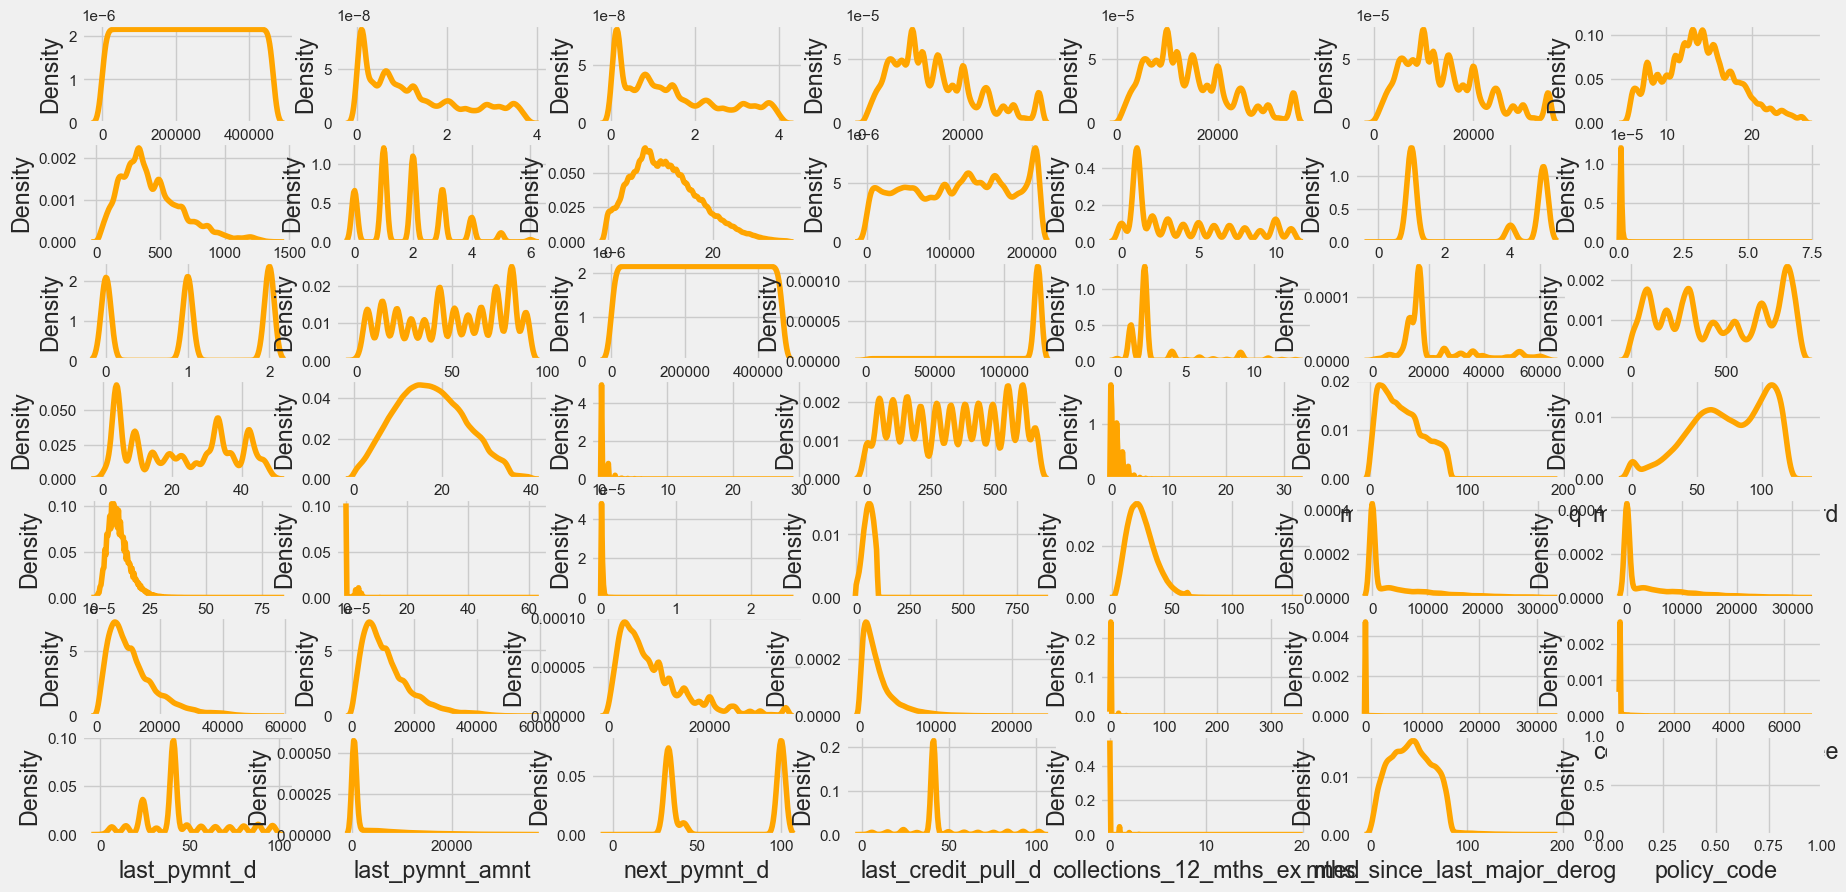

In [372]:
fig, axs = plt.subplots(7, 7, figsize=(20, 10))

axs = axs.flatten()

for i in range(len(list_temp)):
    sns.kdeplot(df_loans2[list_temp[i]], color='orange', ax=axs[i])

plt.tight_layout()
plt.show()

In [16]:
df_loans2['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [17]:
df_loans2['Target'] = df_loans2['loan_status'].apply(lambda x: 'Good Loans' if x in ['Current', 'Fully Paid', 'In Grace Period'] else 'Bad Loans')

In [18]:
df_target_grp = df_loans2.groupby(['Target']).agg(Client_cnt = ('id','count')).sort_values('Client_cnt', ascending=False)
df_target_grp.reset_index(inplace=True)

df_target_grp['Percentage'] = round(df_target_grp['Client_cnt']/df_target_grp['Client_cnt'].sum()*100,2)

df_target_grp

Target  Client_cnt  Percentage
0  Good Loans      412111       88.38
1   Bad Loans       54174       11.62

Text(0, 0.5, 'Percentage by Total Clients')

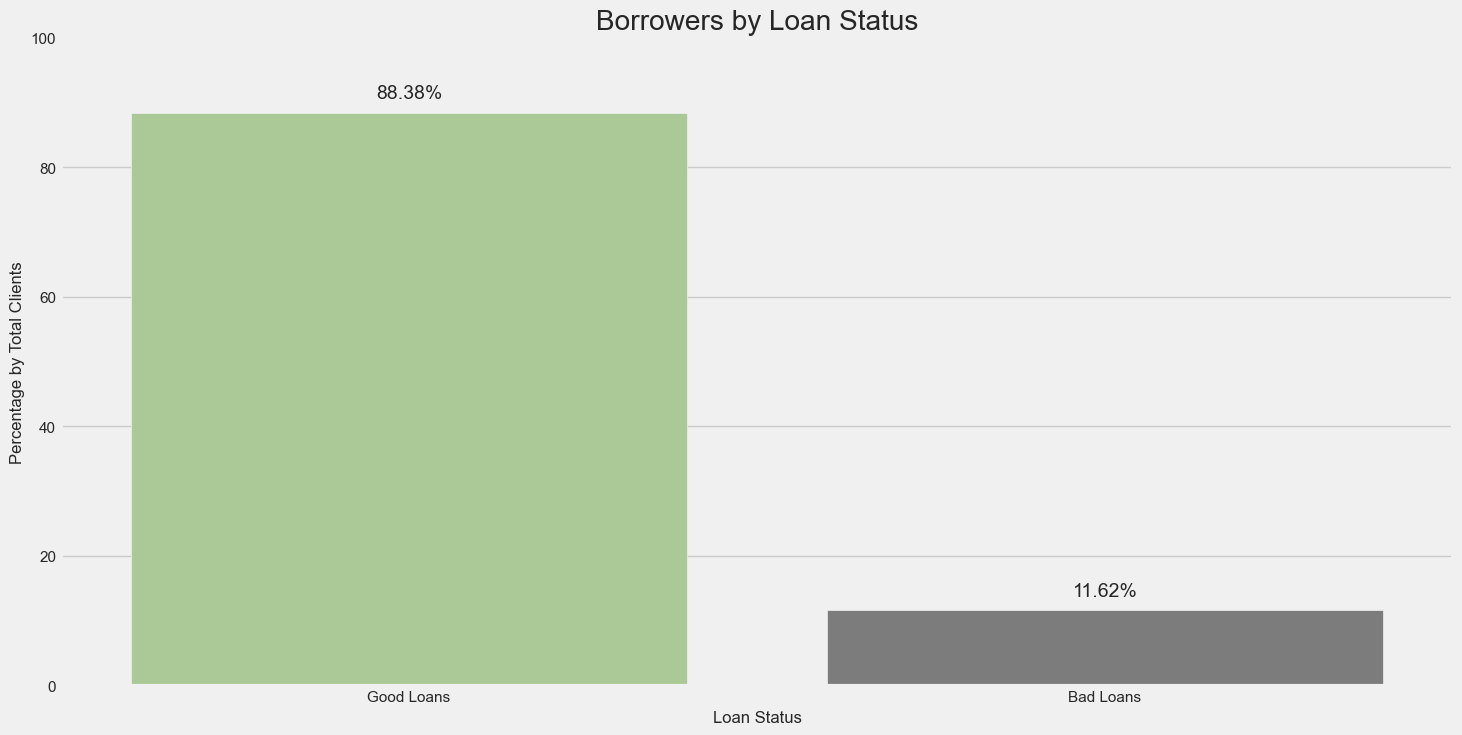

In [19]:
#plt.figure(figsize=(6,8))
temp_palette = {
    'Good Loans': '#A9D18E',
    'Bad Loans': '#7C7C7C'
}

ax_diff = sns.barplot(x='Target', y='Percentage', data=df_target_grp, palette=temp_palette)

pt.get_text(ax_diff,0.5,3)
    
plt.ylim(0, 100)

plt.title('Borrowers by Loan Status')
plt.xlabel('Loan Status',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

### INSIGHT:
1. 87.71% client tidak mengalami kesulitan membayar, hali ini berarti bahwa perusahaan sebagai lender memiliki performa produk pinjaman yang baik-
    dan juga memiliki manajemen resiko dan penilaian yang baik.
2. 12.29% client mengalami kesulitan membayar, hal ini memiliki arti bahwa perusahaan perlu mempelajari lebih karakteristik client-
    sehingga perusahaan dapat mengidentifikasi tanda peringatan awal dan mengimplementasikan mitigasi dari pembayaran yang gagal.

In [524]:
def loan_trend_group(col):
    df_col_grp = df_loans2.groupby(['Target', col]).agg(Client_cnt = ('id','count')).sort_values('Client_cnt', ascending=False)
    df_col_grp.reset_index(inplace=True)
    
    df_col_grp['Percentage'] = round(df_col_grp['Client_cnt']/df_col_grp['Client_cnt'].sum()*100,2)
    
    return df_col_grp

def visualize_trend(object_col, chart_orientation, palette, chart_params):
    fig, ax = plt.subplots()

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    col_grp = loan_trend_group(object_col)
    
    if chart_orientation=='horizontal':
        ax_hbartype = sns.barplot(y=object_col, x='Percentage', hue='Target',data=col_grp, palette=palette, orient='horizontal')

        pt.get_text_horz(ax_hbartype, **chart_params)
        plt.legend(loc='lower right')
    elif chart_orientation=='vertical':
        ax_hbartype_vert = sns.barplot(y='Percentage', x=object_col, hue='Target',data=col_grp, palette=palette)

        pt.get_text(ax_hbartype_vert, **chart_params)

    for spine in ax.spines.values():
        spine.set_visible(False)
    
    #plt.xlim(0,60)
    plt.title(f"Client's loan status by {object_col}")
    plt.xlabel('Loans Status',fontsize=12)
    plt.ylabel('Percentage by Total Clients',fontsize=12)
    plt.xticks([])
    
    plt.show()

In [414]:
def merged_grp(col):
    df_merge_grp = df_loans2.groupby(col).agg(good_cnt=('Target', lambda x: (x == 'Good Loans').sum())).sort_values('good_cnt', ascending=False)
    df_merge_grp.reset_index(inplace=True)
    
    df_merge_grp2 = df_loans2.groupby(col).agg(bad_cnt=('Target', lambda x: (x != 'Good Loans').sum())).sort_values('bad_cnt', ascending=False)
    df_merge_grp2.reset_index(inplace=True)

    merged_df = pd.merge(df_merge_grp, df_merge_grp2, on=col, how='outer').sort_values(by=['good_cnt'], ascending=False)
    
    merged_df['percentage_good'] = round(merged_df['good_cnt']/(merged_df['good_cnt']+merged_df['bad_cnt'])*100,2)
    merged_df['percentage_bad'] = round(merged_df['bad_cnt']/(merged_df['good_cnt']+merged_df['bad_cnt'])*100,2)

    return merged_df

def loans_dist_categories(object_col, avg_line=False, rotate_xticks=False, no_text=False, label_size_x=13):
    fig, ax = plt.subplots()

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    dist_df = merged_grp(object_col)

    dist_df = dist_df.sort_values('percentage_good', ascending=False)
    
    ax_dist_good = ax.bar(dist_df[object_col], dist_df['percentage_good'], color='#A9D18E')
    ax_dist_bad = ax.bar(dist_df[object_col], dist_df['percentage_bad'], bottom=dist_df['percentage_good'], color='grey')

    if no_text == False:
        for bar in ax_dist_good:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2, height/2,
                f'{round(height,2)}%', ha='center', va='center', color='black', fontsize=15
            )

        for bar in ax_dist_bad:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2, bar.get_y() + height/2,
                f'{round(height,2)}%', ha='center', va='center', color='white', fontsize=15
            )
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    max_value = dist_df['percentage_good'].max()
    avg_value = dist_df['percentage_good'].mean()
    
    # Draw the reference line at the maximum value
    ax.axhline(max_value, color='white', linestyle='--', linewidth=2, label=f'Max Value: {round(max_value, 2)}%')
    
    if avg_line == True:
        ax.axhline(avg_value, color='#F7CA77', linestyle='--', linewidth=2, label=f'Max Value: {round(avg_value, 2)}%')
    
    plt.yticks([])
    plt.title(f"Client's loan status by {object_col}")
    plt.xlabel(f'{object_col}',fontsize=12)
    ax.tick_params(axis='x', labelsize=label_size_x)
    if rotate_xticks == True:
        plt.xticks(rotation=45)
    #plt.xticks([])

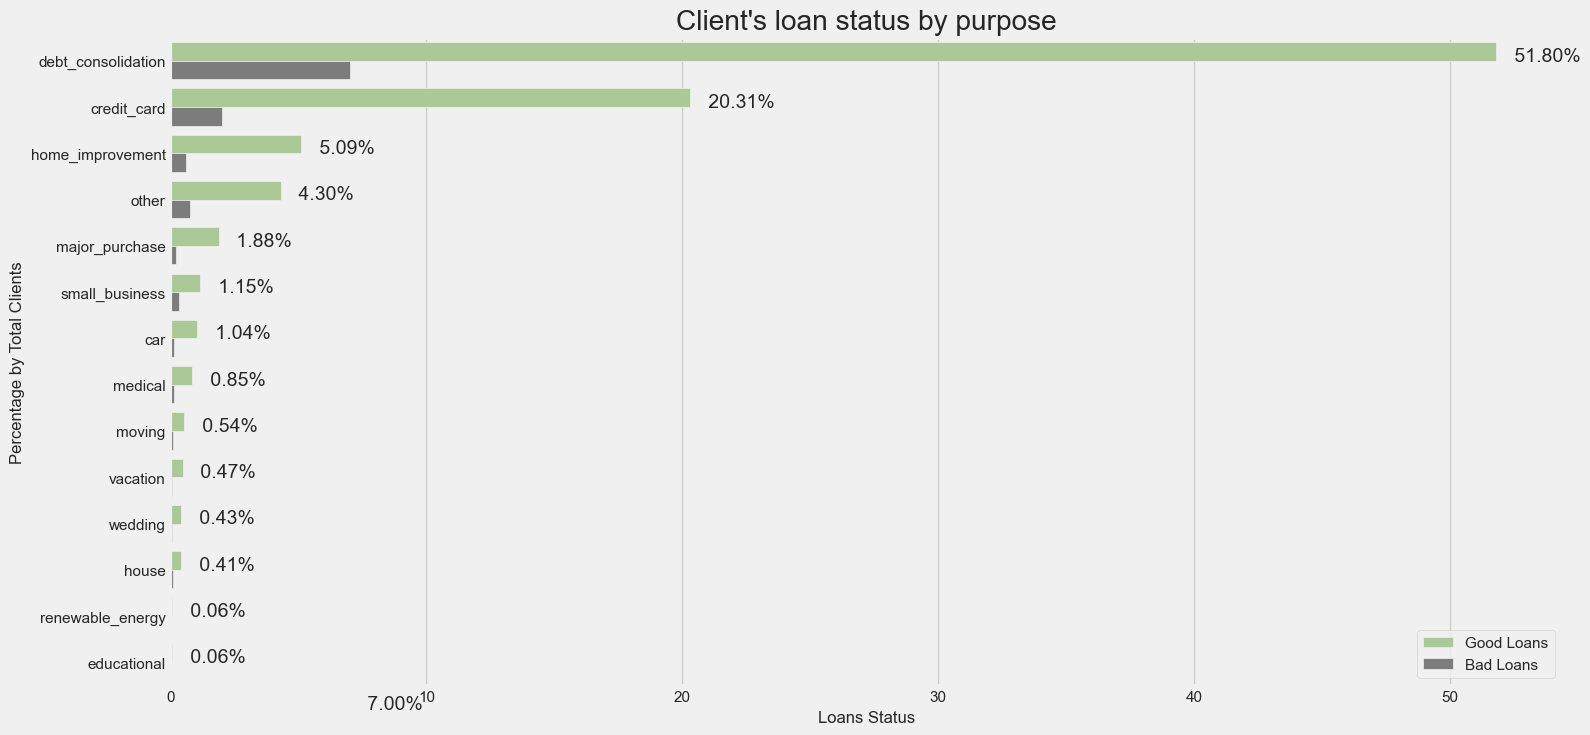

In [23]:
visualize_trend('purpose', 'horizontal',temp_palette,{'x_pos':0.5, 'y_pos':0, 'font_size':12, 'display':'partial'})

### INSIGHT:
- 51.80% of borrowers with good loans are in the debt consolidation category, followed by the credit card category at 21.17%. This suggests that most borrowers are more inclined to take loans for the purpose of debt consolidation. This could be because debt consolidation loans generally come with longer repayment terms compared to other loan categories. According to Forbes.com, while borrowers may have to pay interest for a longer period of time, it can also significantly reduce their monthly payments.
- The reason for the loans category credit card prevalence is because credit card loans typically have faster application processes and quicker approvals compared to debt consolidation loans which comes as more appealing for immediate needs or unexpected expenses.

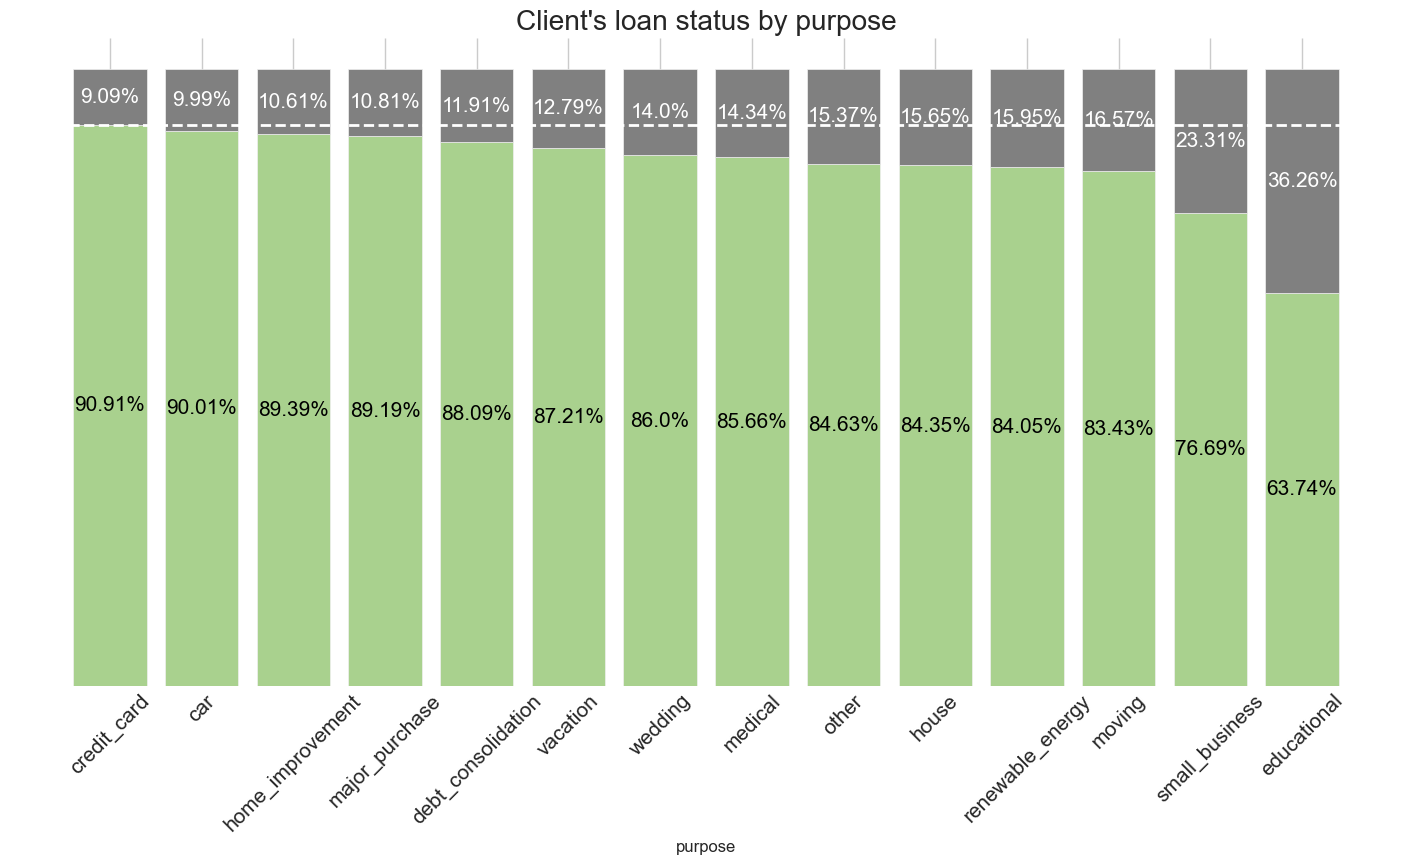

In [522]:
loans_dist_categories('purpose', False, True, False, 15)

### INSIGHT:
- Most loan purposes have a good loan rate of 80% or higher, with only two groups falling below this threshold. This suggests that the current risk assessment model is quite effective in evaluating borrowers' intentions and capabilities.
- Borrowers with a loan purpose of credit card have the highest rate of good loans, with more than 90% of borrowers in this group having good loans. Although this group does not have the highest number of borrowers, it still accounts for over 22% of the total borrower base. Borrowers in this group are more likely to result in good loans, suggesting that the company can expect nearly one-fifth of their total borrowers to be able to repay their loans.
- Borrowers whose loans are for car payments have the second-highest rate of good loans which is at 90%. This is notable given that they represent only about 1% of the total borrower base. Similarly, borrowers with loans for home improvement and major purchases also have high rates of good loans, with only a slight difference of 0.5% to 1%, despite these groups making up at most 5% of the total borrowers.
- Borrowers with loans for debt consolidation have a high rate of good loans at 88%, and this loan purpose accounts for over 57% of the total borrower base. This suggests that more than half of the company’s borrowers are less likely to face payment difficulties, contributing to the overall higher rate of good loans. Additionally, this indicates that borrowers in this group may be well-suited for tailored products or services designed specifically for this loan purpose.
- Borrowers whose loan purposes are related to small business and education have some of the lowest rates of good loans, ranging from approximately 63% to 76%, and they also have the highest percentage of borrowers experiencing payment difficulties. This suggests that, despite making up a small portion of the total borrower base, these groups represent the highest risk among the various loan purposes.

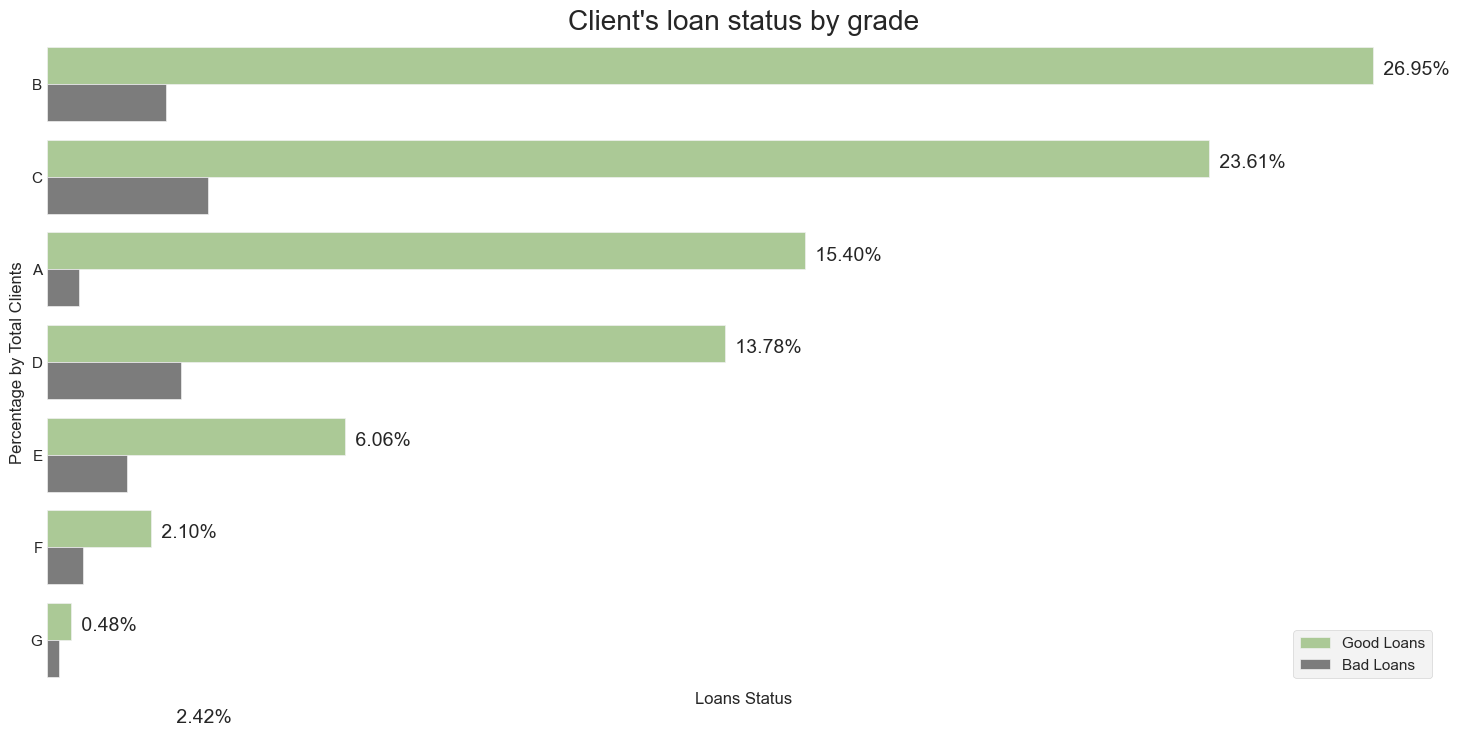

In [526]:
visualize_trend('grade', 'horizontal',temp_palette,{'x_pos':0.1, 'y_pos':-0.1, 'font_size':12, 'display':'partial'})

### INSIGHT:
- Grade B reaching 26.95% are the highest percentage of clients that have good loans, followed second grade C having only a slight margin of around 3%. This suggest that a significant portion of clients are relatively low-risk borrower, followed closely by a substantial number of moderate-risk borrowers.
- Grade A with 15.40% of clients that have good loans suggest that quite a significant part of borrower are in the low-risk category while also having strong profiles and excelent credit histories.
- Grade D with 13.78% while having substantial amount of borrower that have good loans, this would also means that company would have to take higher stake when lending to these high-risk borrower, according to consumerfinance.gov higher interest rate would be approriate due to the perceived risk associated with lending to such borrowers.
- Grade E,F,G while having the lowest percentage, are also the high to the highest risk grade, the likelihood of borrower in these grades to default on loans are considered to be much higher than the rest of the grades, as such company need to be more strict when considering to accept loans aplication from such borrowers.

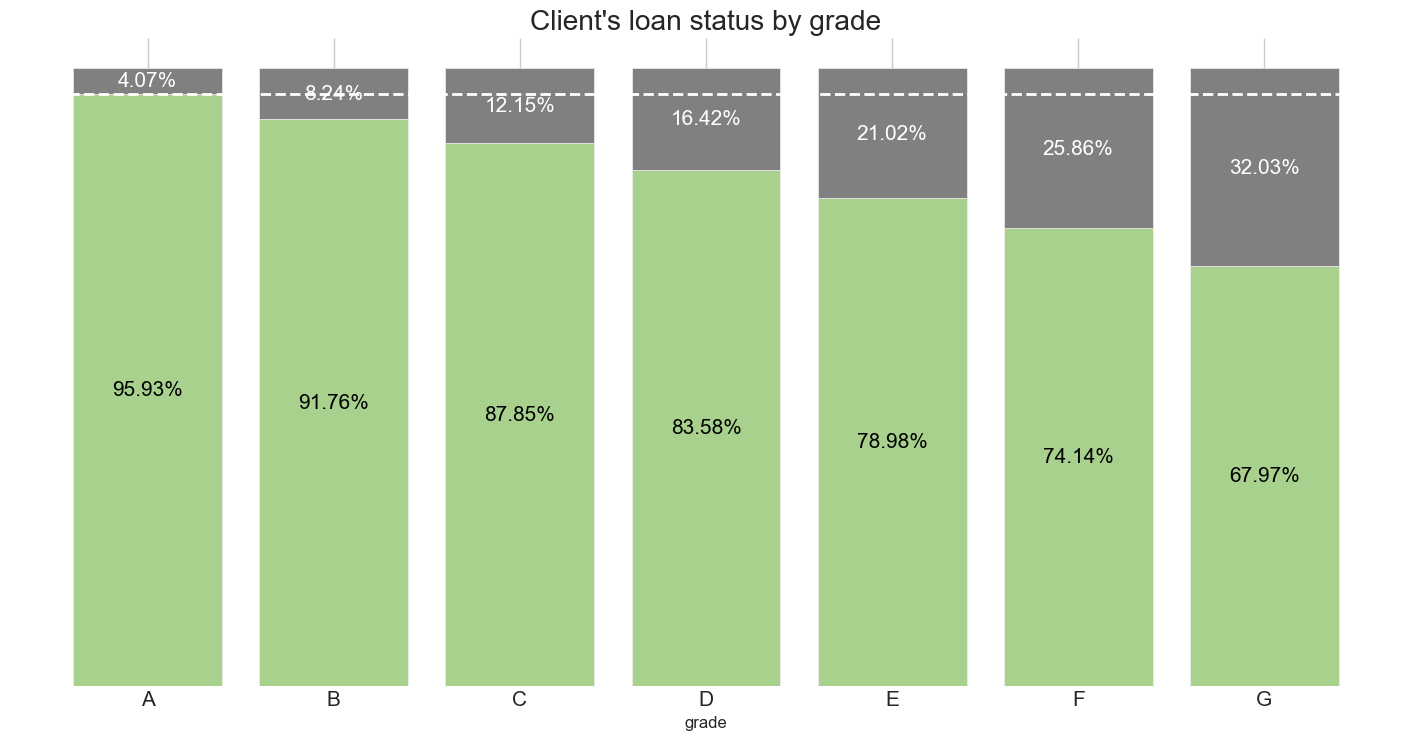

In [520]:
loans_dist_categories('grade', False, False, False, 15)

### INSIGHT:
- Despite not being the grade with the highest number of clients, Grade A has the highest percentage of clients with good loans, reaching around 96%. This indicates that clients with high-grade loans are less likely to have difficulty in repaying and supports the notion that this group of clients has the least risk.
- There is a clear upward trend in risk, as evidenced by the percentage increase in bad loans, from 4% and doubling as the grades decrease. This indicates an exponential increase in risk as the loan grades drop from A to G.
- It is expected that around 83% of clients within their loan-grade group will have good loans. This suggests that the company can anticipate the majority of clients in each loan grade to be able to repay their loans. However, the company should remain cautious when accepting loans that are considered to be in the lower grades. Although these clients represent a minority of the total client base, they have the highest percentage of bad loans compared to those in mid to higher grades.

In [487]:
grade_order = ['A','B','C','D','E','F','G']

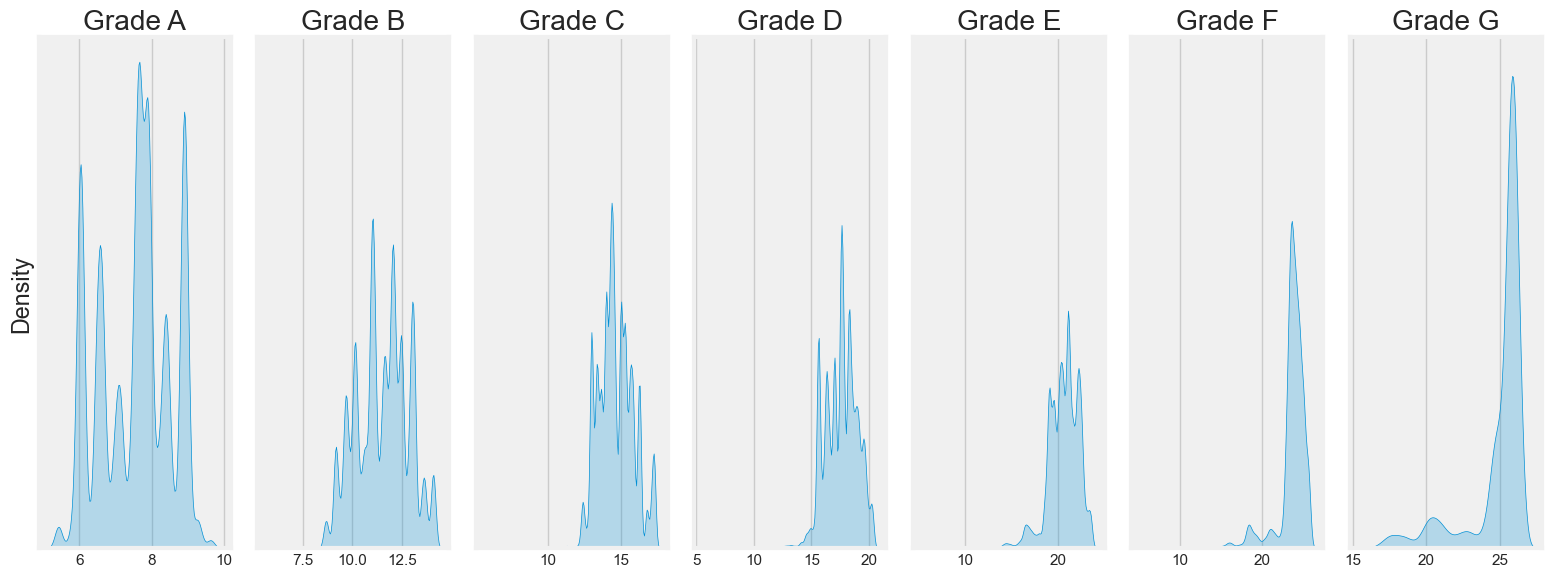

In [514]:
df_filtered = df_loans2[df_loans2['grade'].isin(grade_order)]

fig, axes = plt.subplots(nrows=1, ncols=len(grade_order), figsize=(16, 6), sharey=True)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

for i, grade in enumerate(grade_order):
    sns.kdeplot(df_filtered[df_filtered['grade'] == grade]['int_rate'], ax=axes[i], shade=True)
    axes[i].set_title(f'Grade {grade}')
    axes[i].set_xlabel('Interest Rate')
    if i == 0:
        axes[i].set_ylabel('Density')
        axes[i].set_xlabel('')
    else:
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        
plt.tight_layout()
plt.yticks([])
plt.show()

- Most common occurrences of high-risk grade D, E, F, and G interest rates are in the range from 15% up-to 27%.
- This finding is inline with (Claessens et al., 2018) that loan grades are a key factor in deciding the interest rate a borrower gets offered. Higher grades borrower would more likely to get lower interest rates, while lower grades face higher borrowing costs.

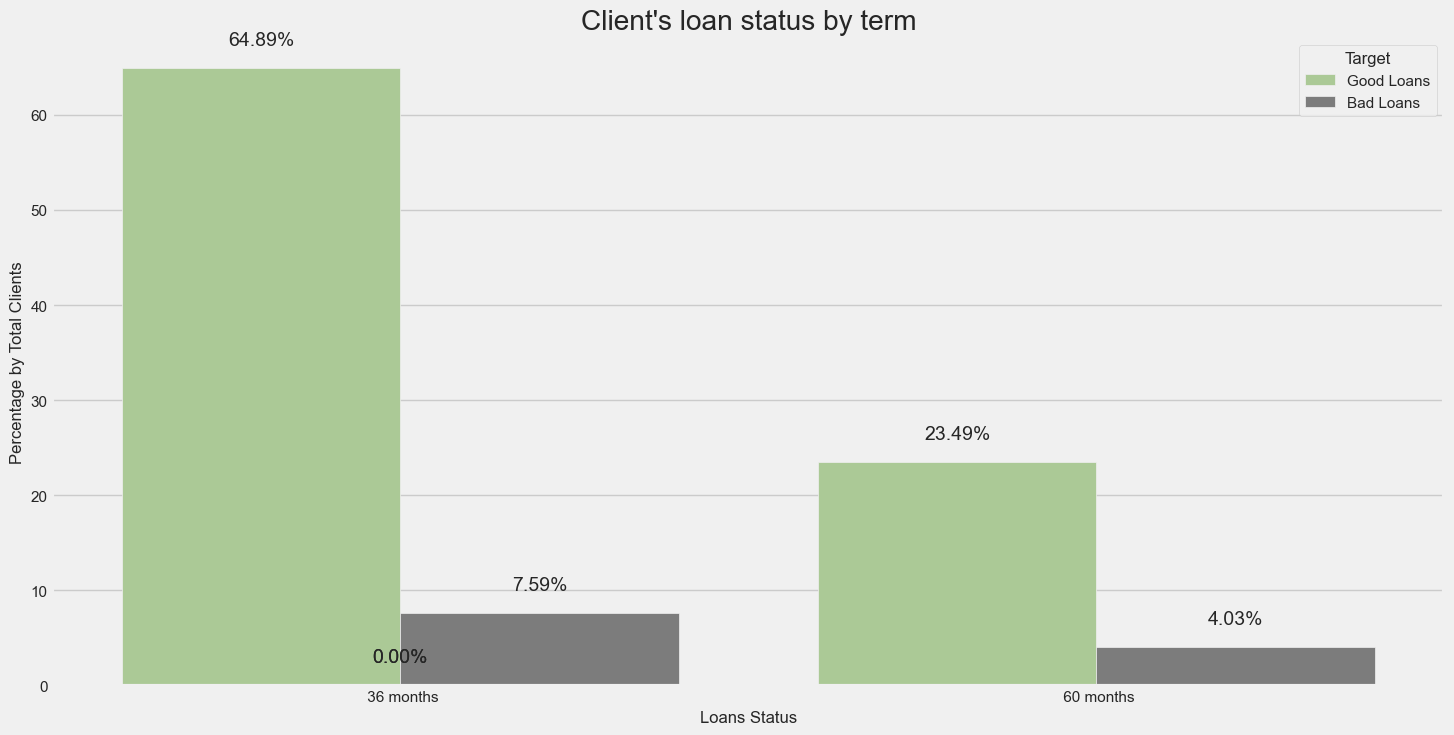

In [33]:
visualize_trend('term', 'vertical',temp_palette,{'x_pos':0.5, 'y_pos':3})

### INSIGHT:
- 64.47% of clients that have no difficulty in repaying loans are those who have 36 months of loan term, while the loan term of 60 months has 23.24% of clients that do not have difficulty in repaying loans.
- Majority of clients with the loan term of 36 months would suggest that there's lower chance of clients to default because of the shorter term compared to 60 months, this would also suggest that the borrower who are in the 36 months loan term would be a fairly low-risk borrower.
- Shorter term is more preferable amongs startups and small businesses, this is because newer businesses tend to have limited credit history and opt for shorter-term loans to build credit and access more favorable financing options in the future.

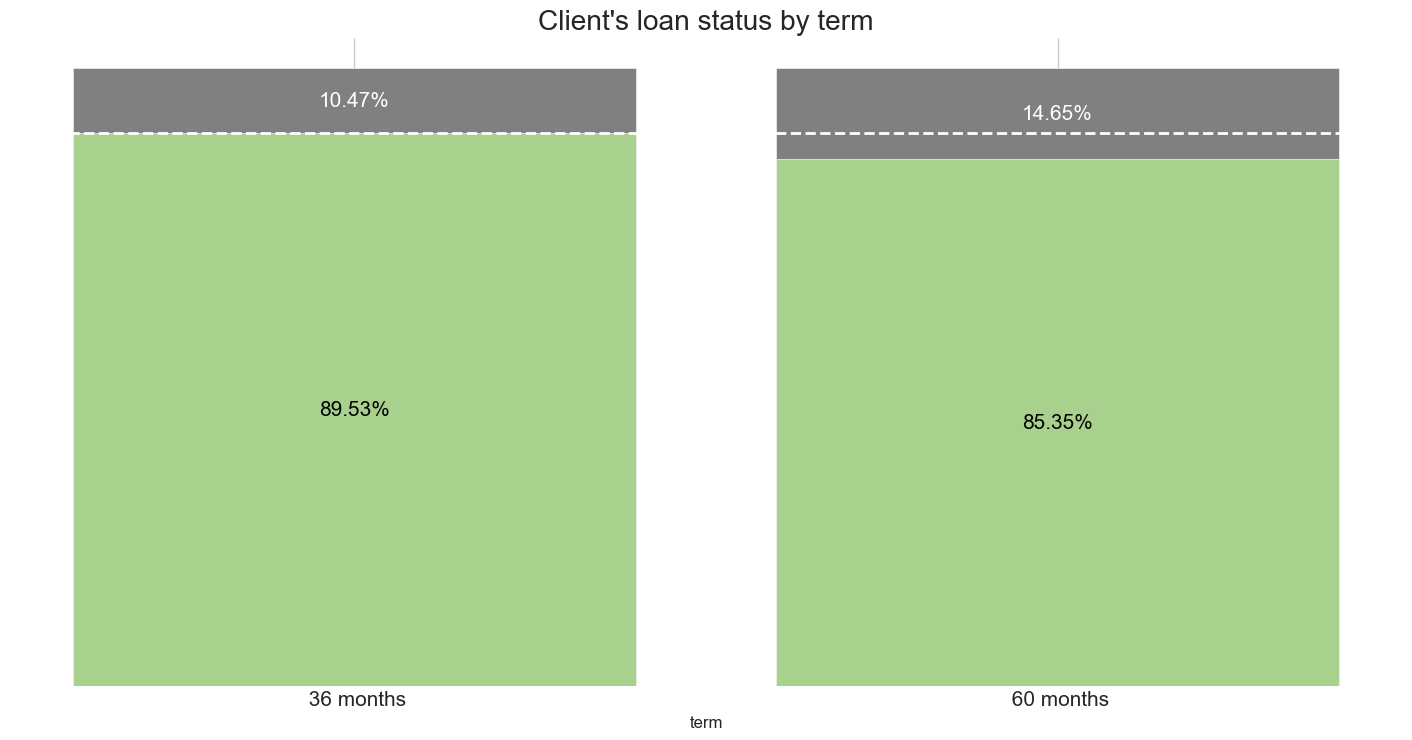

In [35]:
loans_dist_categories('term')

### INSIGHT:
- There’s only a slight difference of around 4% in the rate of clients with good loans. This indicates that the term of the loans might not have a direct impact on clients’ ability to repay loans. This is evident in the 60-month term; despite having significantly fewer clients in this group, it has nearly the same rate of clients with good loans compared to those in the 36-month term group.

In [37]:
for index, row in df_loans2.iterrows():
    if row['emp_length'] == '< 1 year':
        df_loans2.at[index, 'emp_tenure'] = 'Short'
    elif row['emp_length'] in ['2 years','3 years','4 years', '5 years']:
        df_loans2.at[index, 'emp_tenure'] = 'Medium'
    elif row['emp_length'] in ['6 years','7 years','8 years', '9 years']:
        df_loans2.at[index, 'emp_tenure'] = 'Long'
    else:
        df_loans2.at[index, 'emp_tenure'] = 'Very Long'

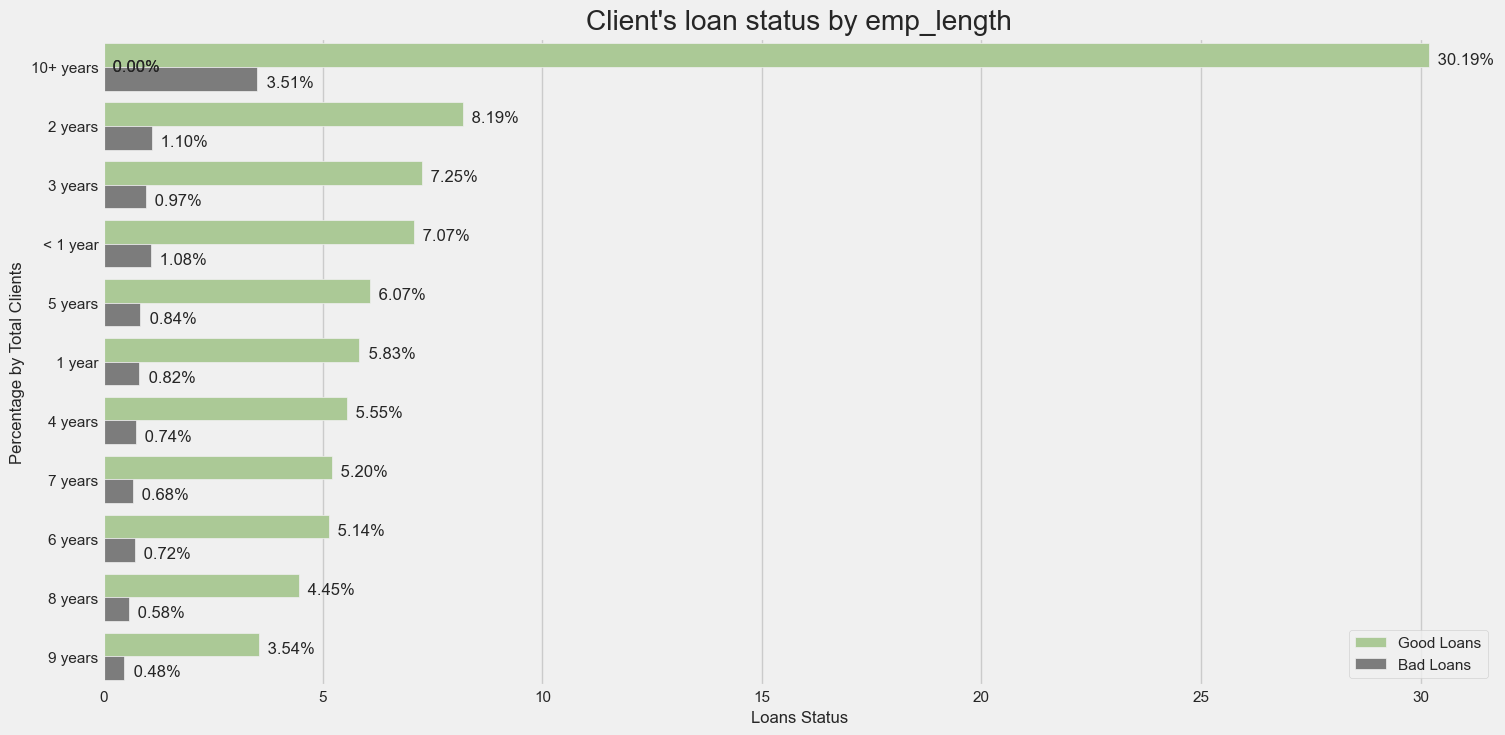

In [38]:
visualize_trend('emp_length', 'horizontal',temp_palette,{'x_pos':0.1, 'y_pos':1.5, 'font_size':12, 'display':'all'})

### INSIGHT:
- 30.19% of borrowers who have been employed for more than 10 years have the highest rate of good loans, a significant difference compared to the rest of the borrower employment range. This suggests that a substantial portion of borrowers have a stable source of income, which in turn leads to a lower likelihood of experiencing difficulty when repaying loans. This finding is in line with Borsi (2018), which indicates that borrowers with longer employment tenure tend to have a lower risk of repayment difficulties. This could also be attributed to the notion that longer employment tenure typically increases financial stability.
- Borrowers who have been employed for 2 years, ranking second with 8.19% who do not experience payment difficulties, suggest that a significant portion of borrowers are in the early stages of their careers but also financially stable enough to ensure their ability to repay loans. 

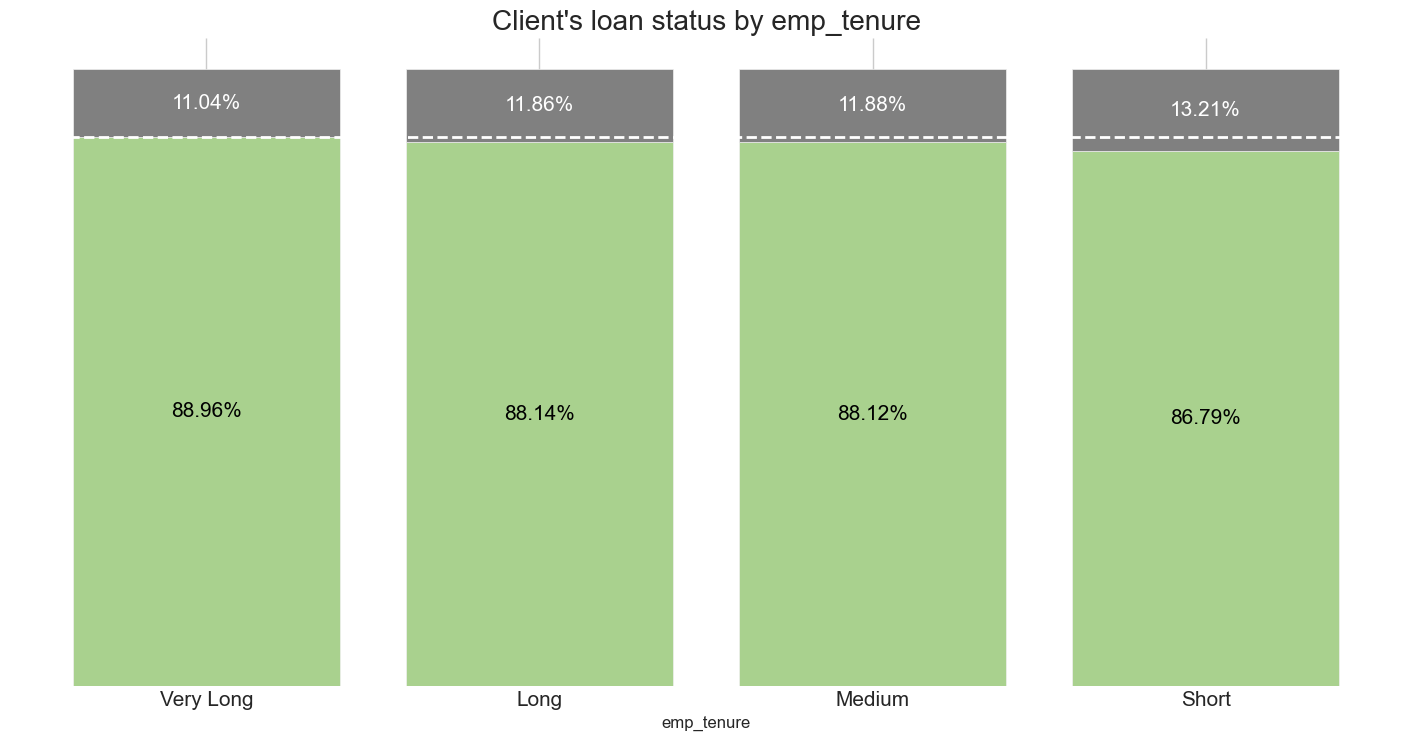

In [40]:
loans_dist_categories('emp_tenure')

### INSIGHT:
- Borrowers with long tenure have the highest rate of good loans, around 89%, and also make up the largest portion of the client base, representing over 35% of the total. This suggests that the majority of the company’s borrowers are those who have presumably established stable jobs for more than 10 years. The company can reasonably expect borrowers in this group to have the means to repay their loans.
- There’s only a slight difference across the tenure lengths of borrowers in the rate of having good loans. This indicates that the length of a borrower's employment doesn't necessarily reflect their ability to repay loans. This is evident as borrowers with short tenure and those with medium, long, or very long tenure show only about a 2% difference, despite representing a relatively small percentage of the total borrower base.

In [42]:
df_loans2['home_ownership'] = df_loans2['home_ownership'].apply(lambda x: 'OTHER' if x=='ANY' else x)

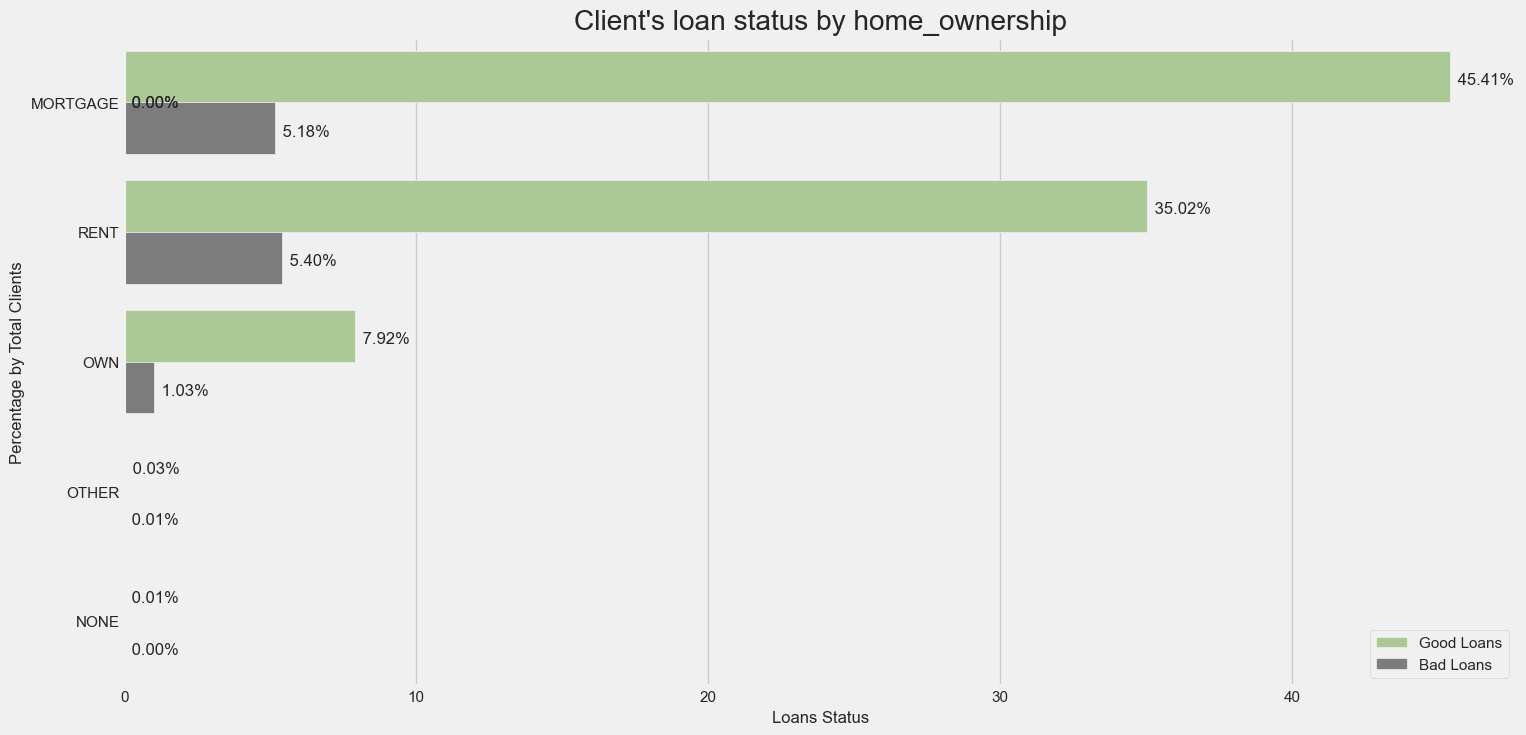

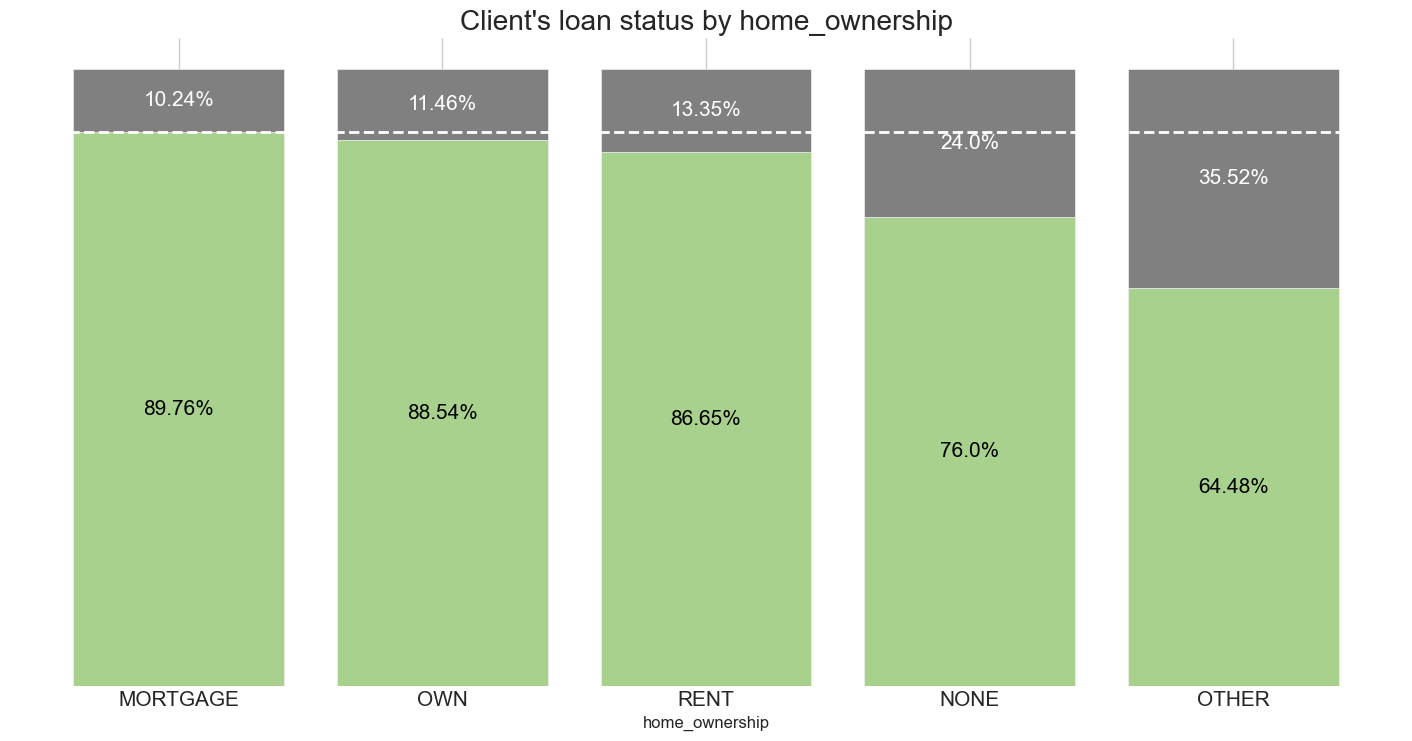

In [43]:
visualize_trend('home_ownership', 'horizontal',temp_palette,{'x_pos':0.1, 'y_pos':1.8, 'font_size':12, 'display':'all'})
loans_dist_categories('home_ownership')

### INSIGHT:
- Borrowers with a mortgage have the highest rate of good loans, exceeding 89%, while also representing the majority, accounting for more than 50% of the total borrower base. This could indicate that borrowers with a mortgage are more likely to repay their loans, suggesting that most of the company’s borrowers are capable of meeting their loan obligations.
- Borrowers who either own or rent a house show a similar rate of good loans, with only a 1% to 2% difference. Homeowners have a slightly higher percentage, placing them as the second-highest group. Despite being relatively smaller in size compared to renters, homeowners are more likely to have good loans. This could indicate that homeowners have slightly higher financial capability, which may ensure their ability to repay loans.
- Borrowers who do not own a house or do not specify their home ownership have the lowest rate of good loans, ranging from 64% to 76%. Both groups also represent a minority, accounting for only about 0.02% of the total borrower base. This suggests that borrowers in these groups might not be suitable for further targeting efforts and are more likely to have difficulty repaying their loans.

In [45]:
# Convert the date string to a datetime object and extract the year
earliest_cr_year = df_loans2['earliest_cr_line'].mode()[0]
df_loans2['earliest_cr_line'] = df_loans2['earliest_cr_line'].fillna(earliest_cr_year)
df_loans2['earlist_cr_year'] = pd.to_datetime(df_loans2['earliest_cr_line'], format='%b-%y').dt.year.clip(upper=2014)

for index, rows in df_loans2.iterrows():
    credit_history = 2014 - rows['earlist_cr_year']
    if credit_history <= 2:
        df_loans2.at[index, 'credit_history'] = '0-2 years'
    elif credit_history <= 5:
        df_loans2.at[index, 'credit_history'] = '2-5 years'
    else:
        df_loans2.at[index, 'credit_history'] = '+5 years'

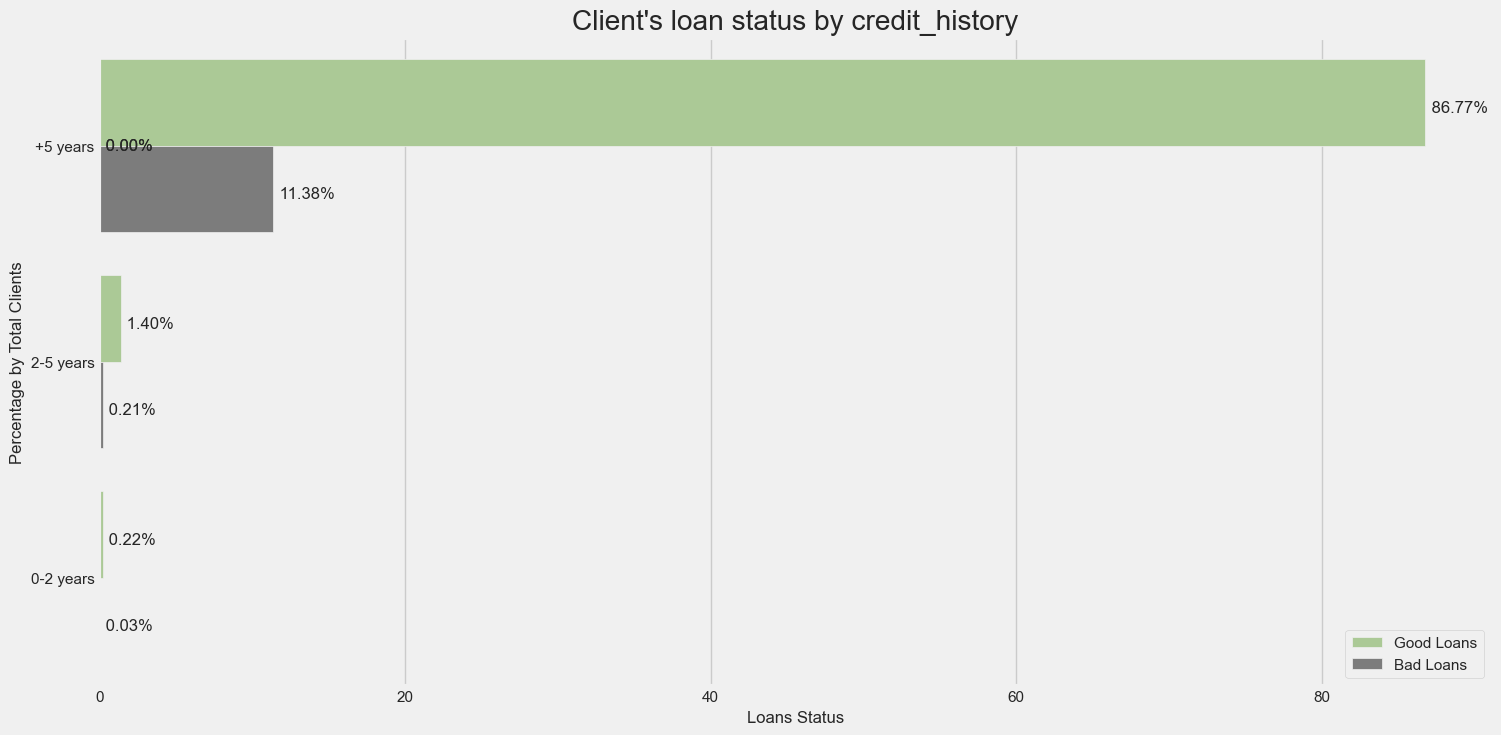

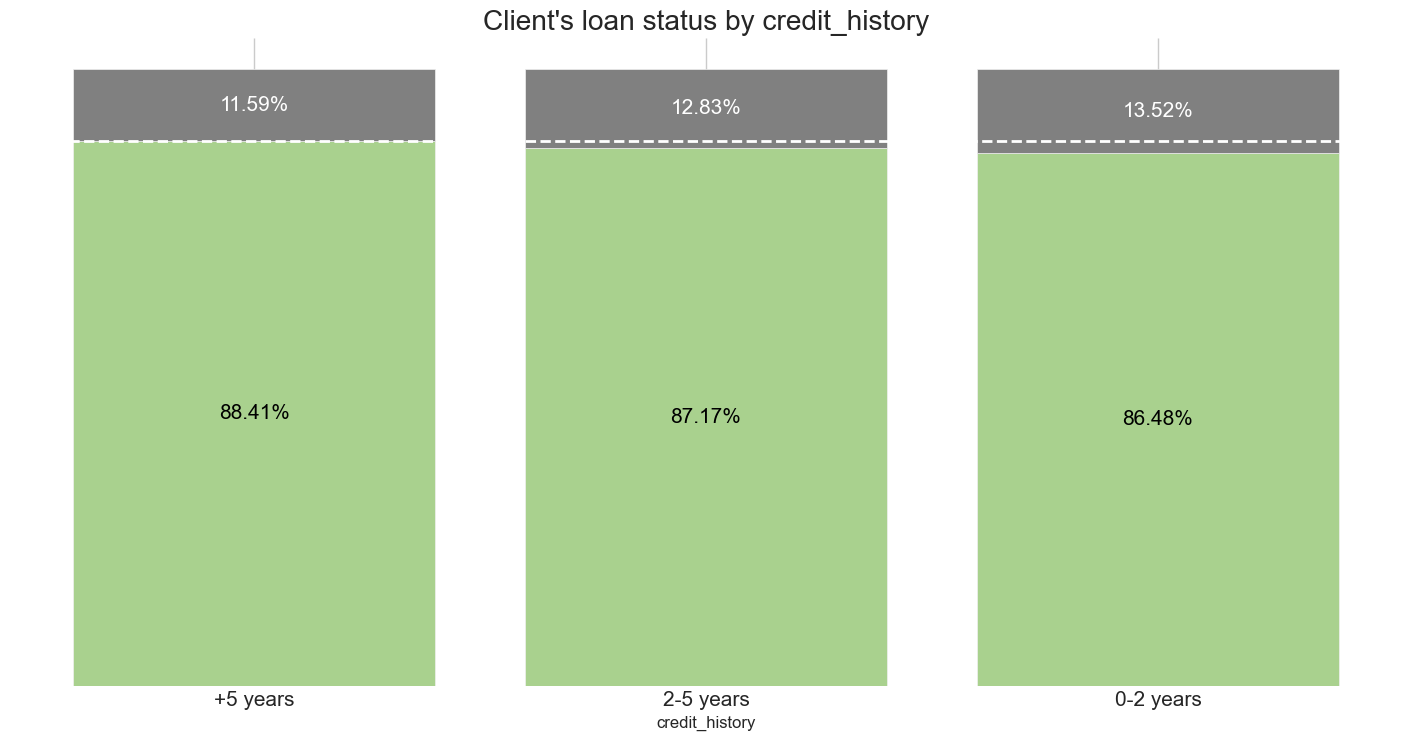

In [46]:
visualize_trend('credit_history', 'horizontal',temp_palette,{'x_pos':0.1, 'y_pos':1.8, 'font_size':12, 'display':'all'})
loans_dist_categories('credit_history')

### INSIGHT:
- A significant portion of the company’s borrower base consists of those with long credit histories (5+ years), accounting for 97% of the total borrowers. Borrowers in this group also have the highest rate of good loans, with more than 88%. This suggests that the loan products might be designed for needs that typically arise later in life, such as high-limit personal loans like those for debt consolidation, which aligns with the analysis results on borrowers' loan purposes.
- Borrowers with short (0-2 years) and medium (2-5 years) credit histories make up only a small portion of the total borrower base, accounting for less than 2% combined. Although underrepresented, borrowers in both of these groups have a rate of good loans similar to those with long credit histories, with only a 1-2% difference. This suggests that the length of credit history might not necessarily indicate a borrower’s ability to repay loans.

In [48]:
for index, rows in df_loans2.iterrows():
    if rows['annual_inc'] < 53657:
        df_loans2.at[index, 'annual_inc_bracket'] = 'Lower Income'
    elif rows['annual_inc'] <= 64923:
        df_loans2.at[index, 'annual_inc_bracket'] = 'Middle Income'
    else:
        df_loans2.at[index, 'annual_inc_bracket'] = 'Upper Income'

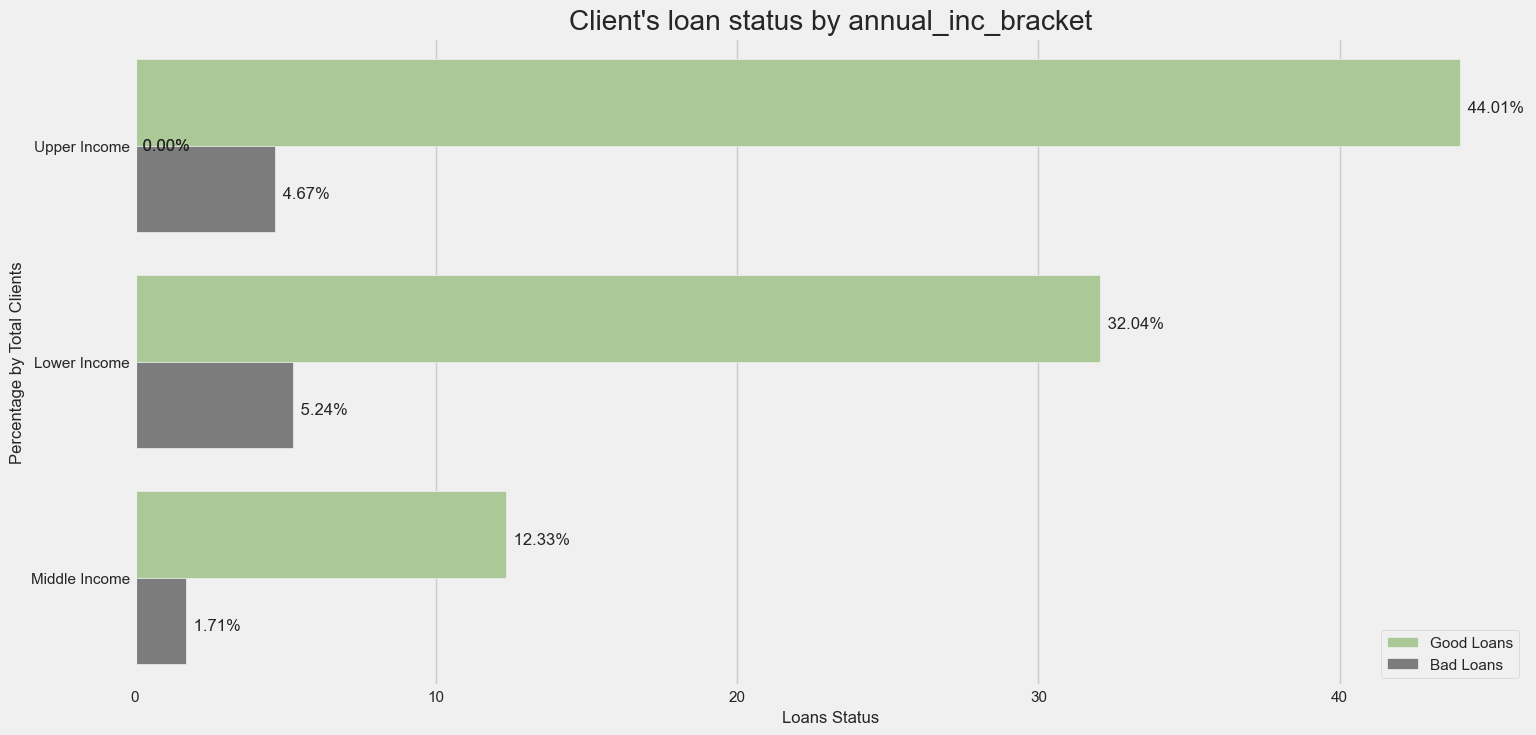

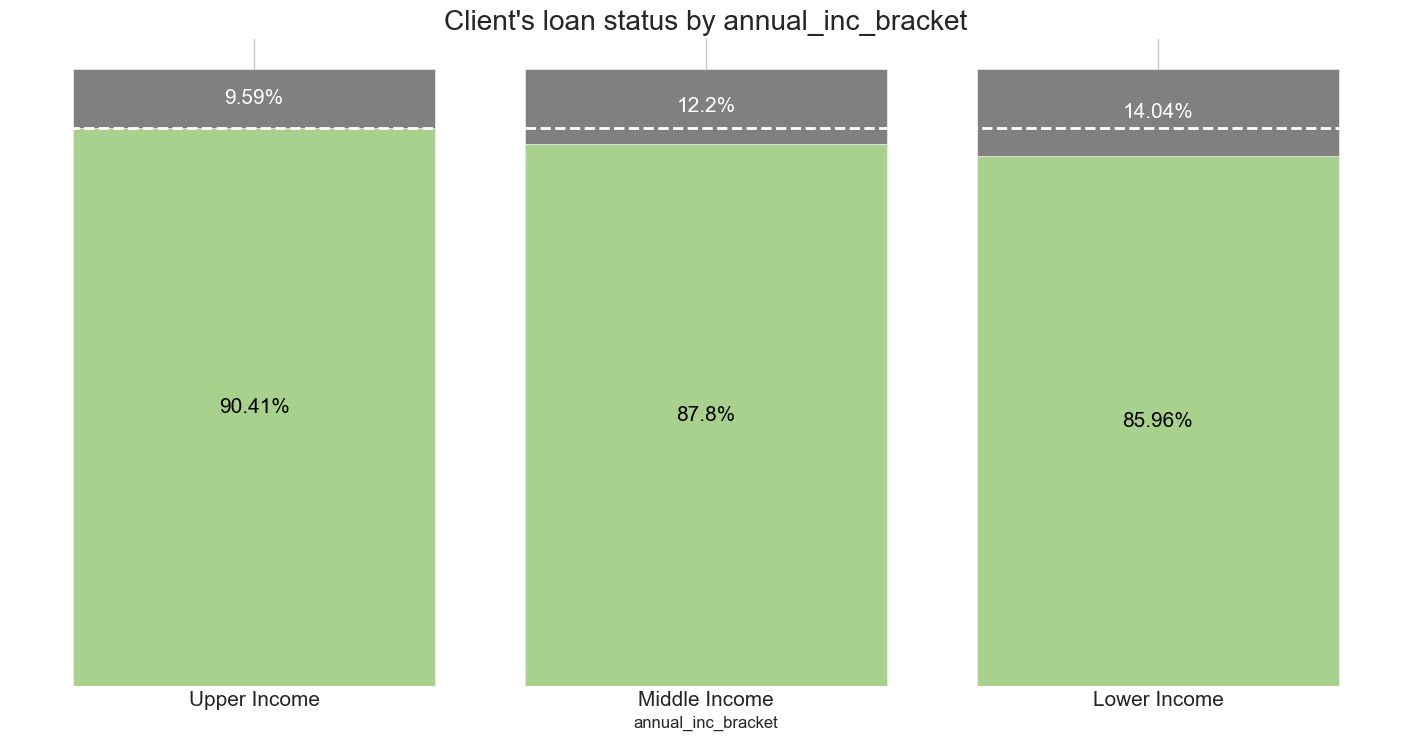

In [49]:
visualize_trend('annual_inc_bracket', 'horizontal',temp_palette,{'x_pos':0.1, 'y_pos':1.8, 'font_size':12, 'display':'all'})
loans_dist_categories('annual_inc_bracket')

### INSIGHT:
- There is a clear trend showing how a borrower’s annual income affects their likelihood of fulfilling loan obligations. This is evident as each step down in income bracket corresponds to a consistent decrease in the rate of good loans by around 2%.
- Most of the borrowers come from upper-income bracket, accounting for more than 48% of the total borrower base. Relative to their size, borrowers in this income bracket have the highest rate of good loans, exceeding 90%, compared to other income brackets. This suggests that a significant portion of the company’s borrowers are among the top 10% of household income, indicating they are more likely to fulfill their loan obligations, as they may not be heavily burdened by the loans they have taken.
- Borrowers from middle-income bracket, despite being the group with the fewest number of borrowers, have the second-highest rate of good loans at over 87%, just slightly more than 2% lower than those in the upper-income bracket. This suggests that borrowers in the middle-income bracket may be promising for further targeting efforts, as they appear to be relatively reliable borrowers.
- Borrowers from the lower-income bracket have the lowest rate of good loans compared to other income brackets, despite being the second-largest group, accounting for more than 37% of the total borrowers. This indicates that borrowers in this income bracket may present a higher risk, as they could be more sensitive to financial burdens, which may ultimately impact their ability to repay loans.

In [51]:
def col_average(num_col):
    col_avg = round(df_loans2[num_col].mean(),2)
    
    col_good = df_loans2[df_loans2['Target'] == 'Good Loans']
    col_good_avg = round(col_good[num_col].mean(),2)
    
    col_bad = df_loans2[df_loans2['Target'] == 'Bad Loans']
    col_bad_avg = round(col_bad[num_col].mean(),2)

    return col_avg, col_good_avg, col_bad_avg

In [52]:
def kde_with_average(num_col):
    col_avg, col_good_avg, col_bad_avg = col_average(num_col)
    sns.kdeplot(data=df_loans2, x=num_col, hue='Target', palette=temp_palette,fill=True)
    
    for val, color in zip([col_avg, col_good_avg, col_bad_avg], ['black', 'orange', 'red']):
        plt.axvline(val, color=color, linestyle='dashed', alpha=.5)
    
    plt.title("Debt-to-income Ratio by Loans Status")
    
    plt.text(0.62, 0.8, f"Average Debt-to-income Ratio: {col_avg}\n"
        f"Debt-to-income Ratio of Good Loans: {col_good_avg}\n"
        f"Debt-to-income Ratio of Bad Loans: {col_bad_avg}",
        bbox=dict(facecolor='w', alpha=0.5, pad=2),
        transform=plt.gca().transAxes, ha="left", va="top")
    
    plt.tight_layout()
    plt.yticks([])
    plt.show()

In [53]:
for index, rows in df_loans2.iterrows():
    if rows['dti'] <=10:
        df_loans2.at[index, 'dti_categories'] = 'Low DTI'
    elif rows['dti'] <= 20:
        df_loans2.at[index, 'dti_categories'] = 'Medium DTI'
    elif rows['dti'] <= 30:
        df_loans2.at[index, 'dti_categories'] = 'High DTI'
    else:
        df_loans2.at[index, 'dti_categories'] = 'Very High DTI'

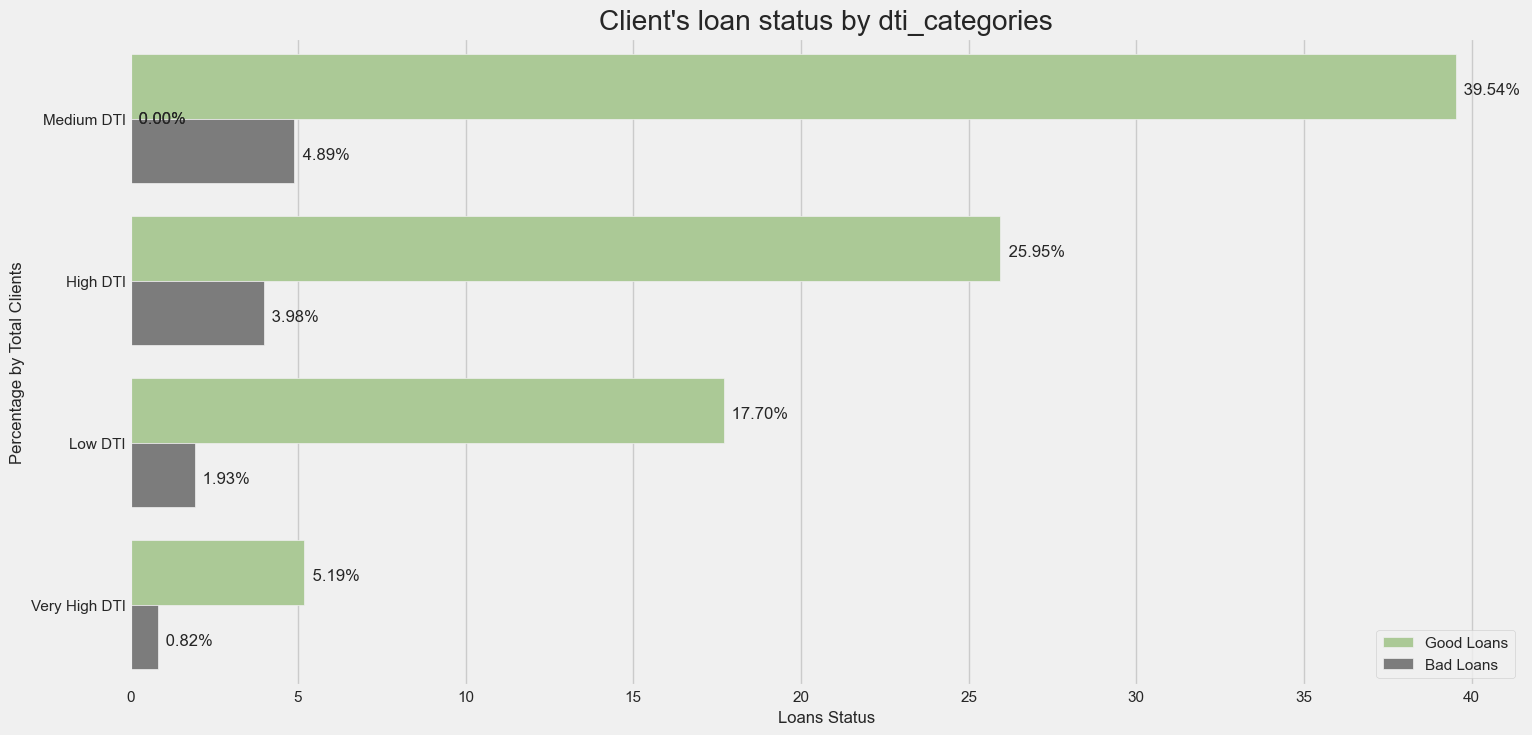

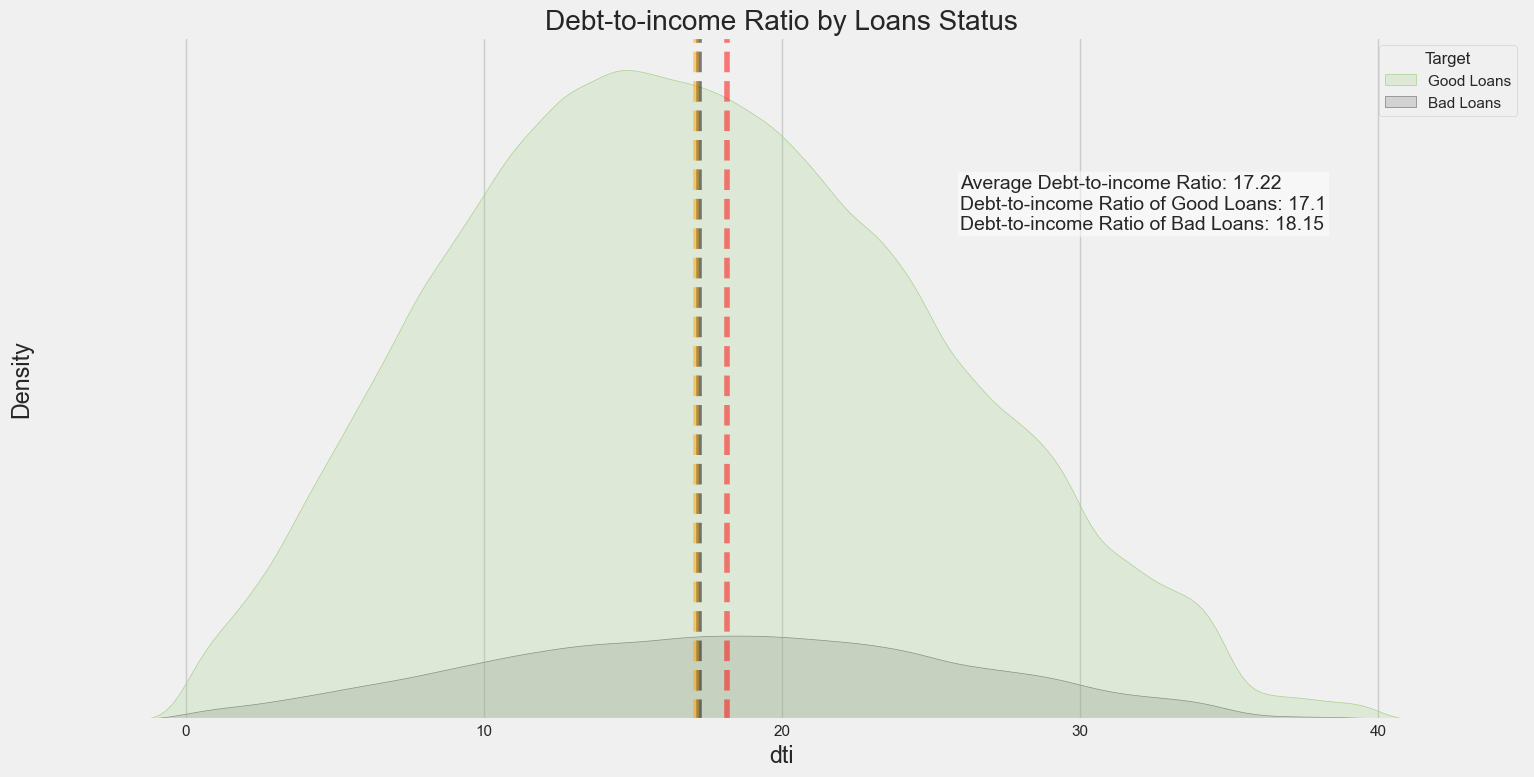

In [54]:
visualize_trend('dti_categories', 'horizontal',temp_palette,{'x_pos':0.1, 'y_pos':1.8, 'font_size':12, 'display':'all'})
kde_with_average('dti')

The lower a borrower's debt-to-income ratio, the better their chances of loan approval. According to Investopedia, The maximum acceptable debt-to-income ratio is 43%, though it’s recommended for borrowers to aim for no more than 35%, with anything below 28% being ideal.
### INSIGHT : 
- The average debt-to-income ratio for all borrowers is 17.22%, which is considered strong and indicates a high level of creditworthiness within the company's borrower base.
- Borrowers with good loans have a debt-to-income ratio ranging from 10% to 20%, with most around 15% and an average of 17.1%, which is close to the overall average for the borrower base. This range could represent the broader borrower population and suggests that it may be optimal or preferred for successful loan repayment.
- Borrowers with bad loans tend to have a debt-to-income ratio ranging from 15% to 25%, with most around 18% and an average of 18.15%. This demonstrates a clear correlation between a higher DTI and an increased likelihood of borrowers resulted in bad loans.

In [56]:
df_loan_factors = df_loans2.groupby(['credit_history','annual_inc_bracket','dti_categories']).agg(borr_good_cnt=('Target', lambda x: (x == 'Good Loans').sum())).sort_values('borr_good_cnt', ascending=False)
df_loan_factors.reset_index(inplace=True)

df_loan_factors2 = df_loans2.groupby(['credit_history','annual_inc_bracket','dti_categories']).agg(borr_bad_cnt=('Target', lambda x: (x == 'Bad Loans').sum())).sort_values('borr_bad_cnt', ascending=False)
df_loan_factors2.reset_index(inplace=True)

df_loan_factors['Loan_Factors'] = df_loan_factors.apply(lambda row: f"{row.iloc[0]} - {row.iloc[1]} - {row.iloc[2]}", axis=1)
df_loan_factors2['Loan_Factors'] = df_loan_factors2.apply(lambda row: f"{row.iloc[0]} - {row.iloc[1]} - {row.iloc[2]}", axis=1)

merged_df = pd.merge(df_loan_factors, df_loan_factors2, on='Loan_Factors', how='outer').sort_values(by=['borr_good_cnt'], ascending=False)
    
merged_df['percentage_good'] = round(merged_df['borr_good_cnt']/(merged_df['borr_good_cnt']+merged_df['borr_bad_cnt'])*100,2)
merged_df['percentage_bad'] = round(merged_df['borr_bad_cnt']/(merged_df['borr_good_cnt']+merged_df['borr_bad_cnt'])*100,2)

In [57]:
merged_df = merged_df.head(15)
merged_df = merged_df.sort_values('percentage_good', ascending=True)

In [58]:
merged_df

credit_history_x annual_inc_bracket_x dti_categories_x  borr_good_cnt  \
0          +5 years         Lower Income         High DTI          50963   
7          +5 years        Middle Income    Very High DTI           3639   
26        2-5 years         Lower Income       Medium DTI           1791   
3          +5 years         Lower Income    Very High DTI          12706   
24        2-5 years         Lower Income         High DTI           1388   
4          +5 years        Middle Income         High DTI          18736   
2          +5 years         Lower Income       Medium DTI          57328   
1          +5 years         Lower Income          Low DTI          23520   
25        2-5 years         Lower Income          Low DTI           1011   
11         +5 years         Upper Income    Very High DTI           7435   
6          +5 years        Middle Income       Medium DTI          25147   
8          +5 years         Upper Income         High DTI          49382   
5          +5 years        Middle Income          Low DTI           9234   
10         +5 years         Upper Income       Medium DTI          98741   
9          +5 years         Upper Income          Low DTI          47763   

                                Loan_Factors credit_history_y  \
0         +5 years - Lower Income - High DTI         +5 years   
7   +5 years - Middle Income - Very High DTI         +5 years   
26     2-5 years - Lower Income - Medium DTI        2-5 years   
3    +5 years - Lower Income - Very High DTI         +5 years   
24       2-5 years - Lower Income - High DTI        2-5 years   
4        +5 years - Middle Income - High DTI         +5 years   
2       +5 years - Lower Income - Medium DTI         +5 years   
1          +5 years - Lower Income - Low DTI         +5 years   
25        2-5 years - Lower Income - Low DTI        2-5 years   
11   +5 years - Upper Income - Very High DTI         +5 years   
6      +5 years - Middle Income - Medium DTI         +5 years   
8         +5 years - Upper Income - High DTI         +5 years   
5         +5 years - Middle Income - Low DTI         +5 years   
10      +5 years - Upper Income - Medium DTI         +5 years   
9          +5 years - Upper Income - Low DTI         +5 years   

   annual_inc_bracket_y dti_categories_y  borr_bad_cnt  percentage_good  \
0          Lower Income         High DTI          9041            84.93   
7         Middle Income    Very High DTI           629            85.26   
26         Lower Income       Medium DTI           301            85.61   
3          Lower Income    Very High DTI          2118            85.71   
24         Lower Income         High DTI           221            86.26   
4         Middle Income         High DTI          2958            86.36   
2          Lower Income       Medium DTI          9039            86.38   
1          Lower Income          Low DTI          3417            87.31   
25         Lower Income          Low DTI           140            87.84   
11         Upper Income    Very High DTI           987            88.28   
6         Middle Income       Medium DTI          3212            88.67   
8          Upper Income         High DTI          6244            88.78   
5         Middle Income          Low DTI          1073            89.59   
10         Upper Income       Medium DTI         10098            90.72   
9          Upper Income          Low DTI          4242            91.84   

    percentage_bad  
0            15.07  
7            14.74  
26           14.39  
3            14.29  
24           13.74  
4            13.64  
2            13.62  
1            12.69  
25           12.16  
11           11.72  
6            11.33  
8            11.22  
5            10.41  
10            9.28  
9             8.16

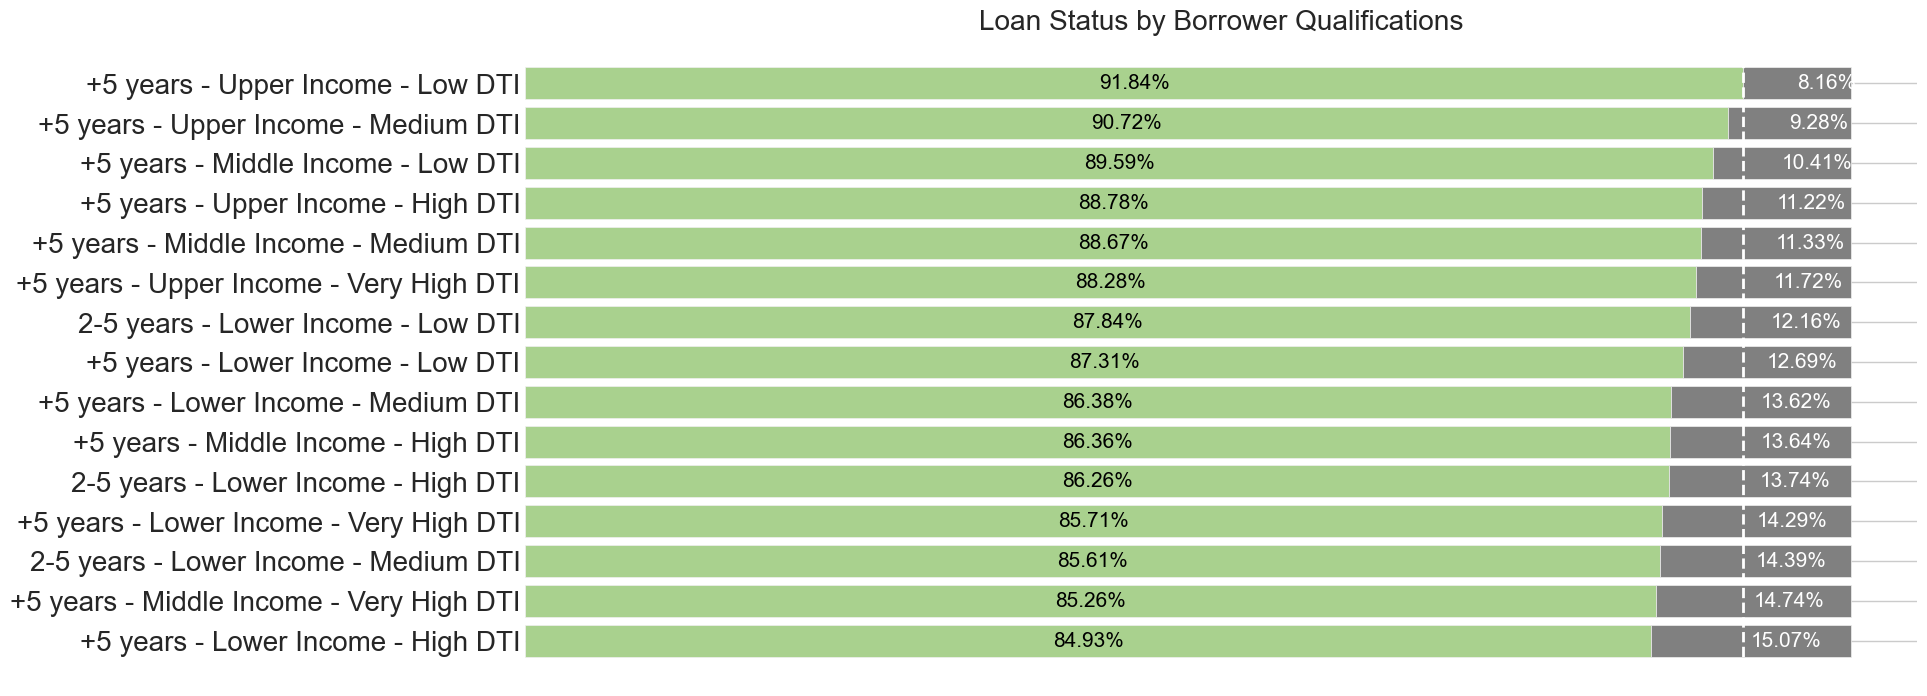

In [59]:
fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax_factors_good = ax.barh(merged_df['Loan_Factors'], merged_df['percentage_good'], color='#A9D18E')
ax_factors_bad = ax.barh(merged_df['Loan_Factors'], merged_df['percentage_bad'], left=merged_df['percentage_good'], color='grey')
            
for bar in ax_factors_good:
    width = bar.get_width()
    ax.text(
        width / 2, bar.get_y() + bar.get_height() / 2,
        f'{round(width, 2)}%', ha='center', va='center', color='black', fontsize=15
    )

for bar in ax_factors_bad:
    width = bar.get_width()
    ax.text(
        bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
        f'{round(width, 2)}%', ha='left', va='center', color='white', fontsize=15
    )

for spine in ax.spines.values():
    spine.set_visible(False)

max_value = merged_df['percentage_good'].max()

ax.axvline(max_value, color='white', linestyle='--', linewidth=2, label=f'Max Value: {round(max_value, 2)}%')
plt.title('Loan Status by Borrower Qualifications')
plt.xticks([])
ax.tick_params(axis='y', labelsize=20)

### INSIGHT : 
- Borrowers with credit histories longer than 5 years consistently show high rates of good loans, especially those in the upper-income bracket with low debt-to-income ratios, which are the qualifications associated with the highest rates of good loans. This suggests that favorable borrower qualifications strongly reflect their ability to manage loan obligations, leading to a higher likelihood of successful repayment without difficulties.
- Borrowers' income brackets and debt-to-income (DTI) ratios are interchangeable within their respective categories. This is evident across different borrower qualifications, where the income bracket and DTI ratio are often the only variables that change, as long as the borrower has a long credit history of more than 5 years. Borrowers with these qualifications still rank among the top five in terms of the highest rates of good loans.
- Borrowers with medium credit histories of 2 to 5 years are the only group, aside from those with credit histories longer than 5 years, to rank among the top qualifications for having the highest rates of good loans. Borrowers with this length of credit history are less impacted by their income bracket and debt-to-income ratio compared to those with longer credit histories and predominantly consist of individuals with lower incomes.

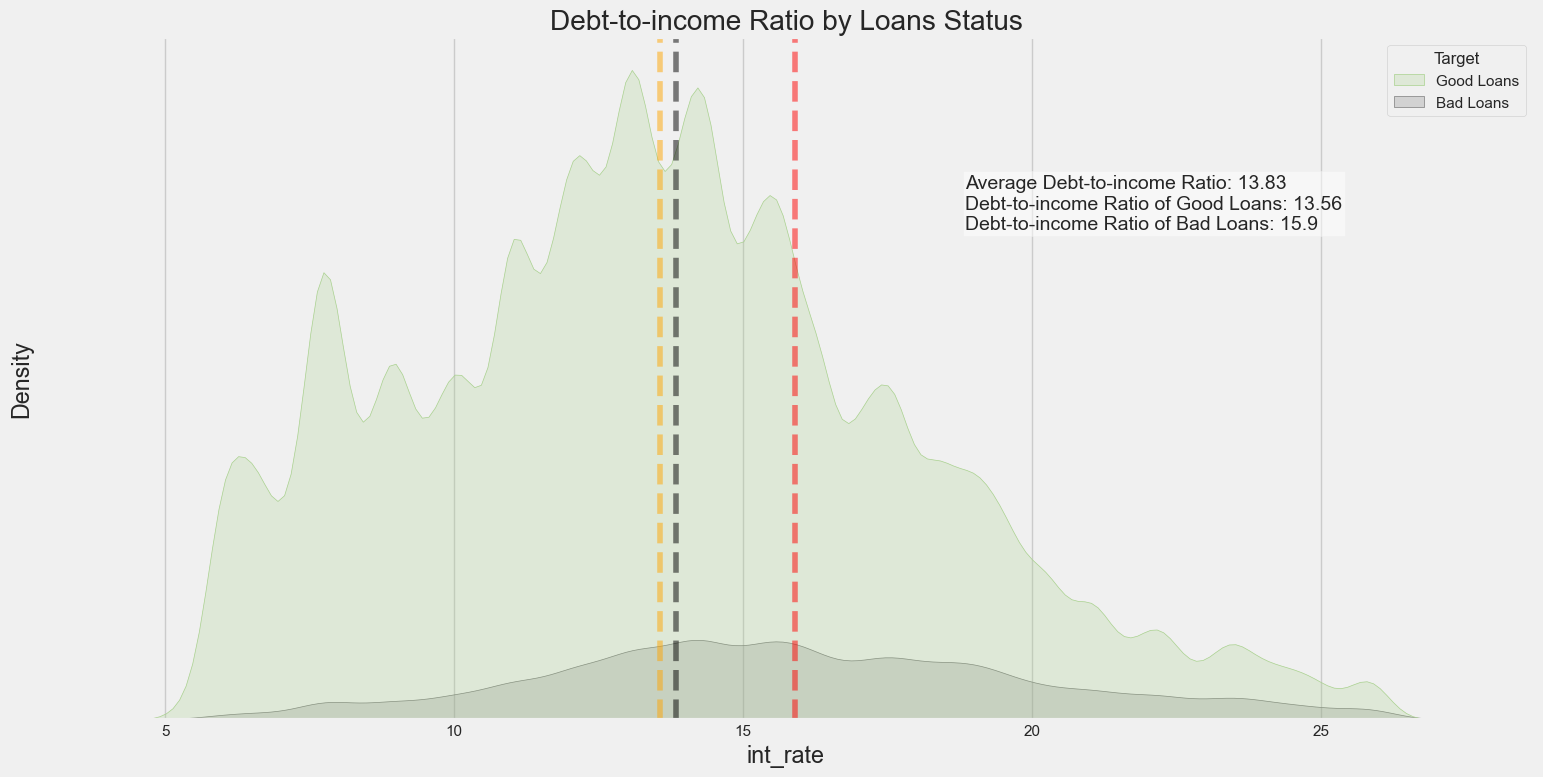

In [61]:
kde_with_average('int_rate')

Based on study done by Bankrate.com, in 2024 the average interest rates for personal loans is 12.10%, while those who has excellent credit score having the lowest interest rates of 10.73% - 12.50%. For borrower with good credit score, the average rate is 13.50% – 15.50%. Borrower with lower credit score will pay a considerably higher average rate possibly reaching 32%.

### INSIGHT : 
- The average interest rate for all borrowers is 13.83%, this would suggest that it is still considered to be good because it's in the range of 12.50% – 15.50%
- The average interest rate for borrowers who do not experience payment difficulty is 13.54%, while for those who experience payment difficulty is 15.9%. The reason why the average interest rate for borrowers who experience payment difficulty is higher is that as a borrower's credit score gets lower, increasing the interest rate becomes a way to compensate for the increased risk the lender have to takes on.

## Multivariate Analysis

In [64]:
df_loans2['Target_bool'] = df_loans2['Target'].apply(lambda x : 1 if x=='Good Loans' else 0)

In [65]:
col_acceptable= df_loans2.columns[round(df_loans2.isna().sum()/df_loans2.shape[0]*100,2) <= 5]

df_loans3 = df_loans2[col_acceptable]

In [66]:
col_num = df_loans3.select_dtypes(exclude=['object'])
list_col_num = col_num.columns

<Axes: >

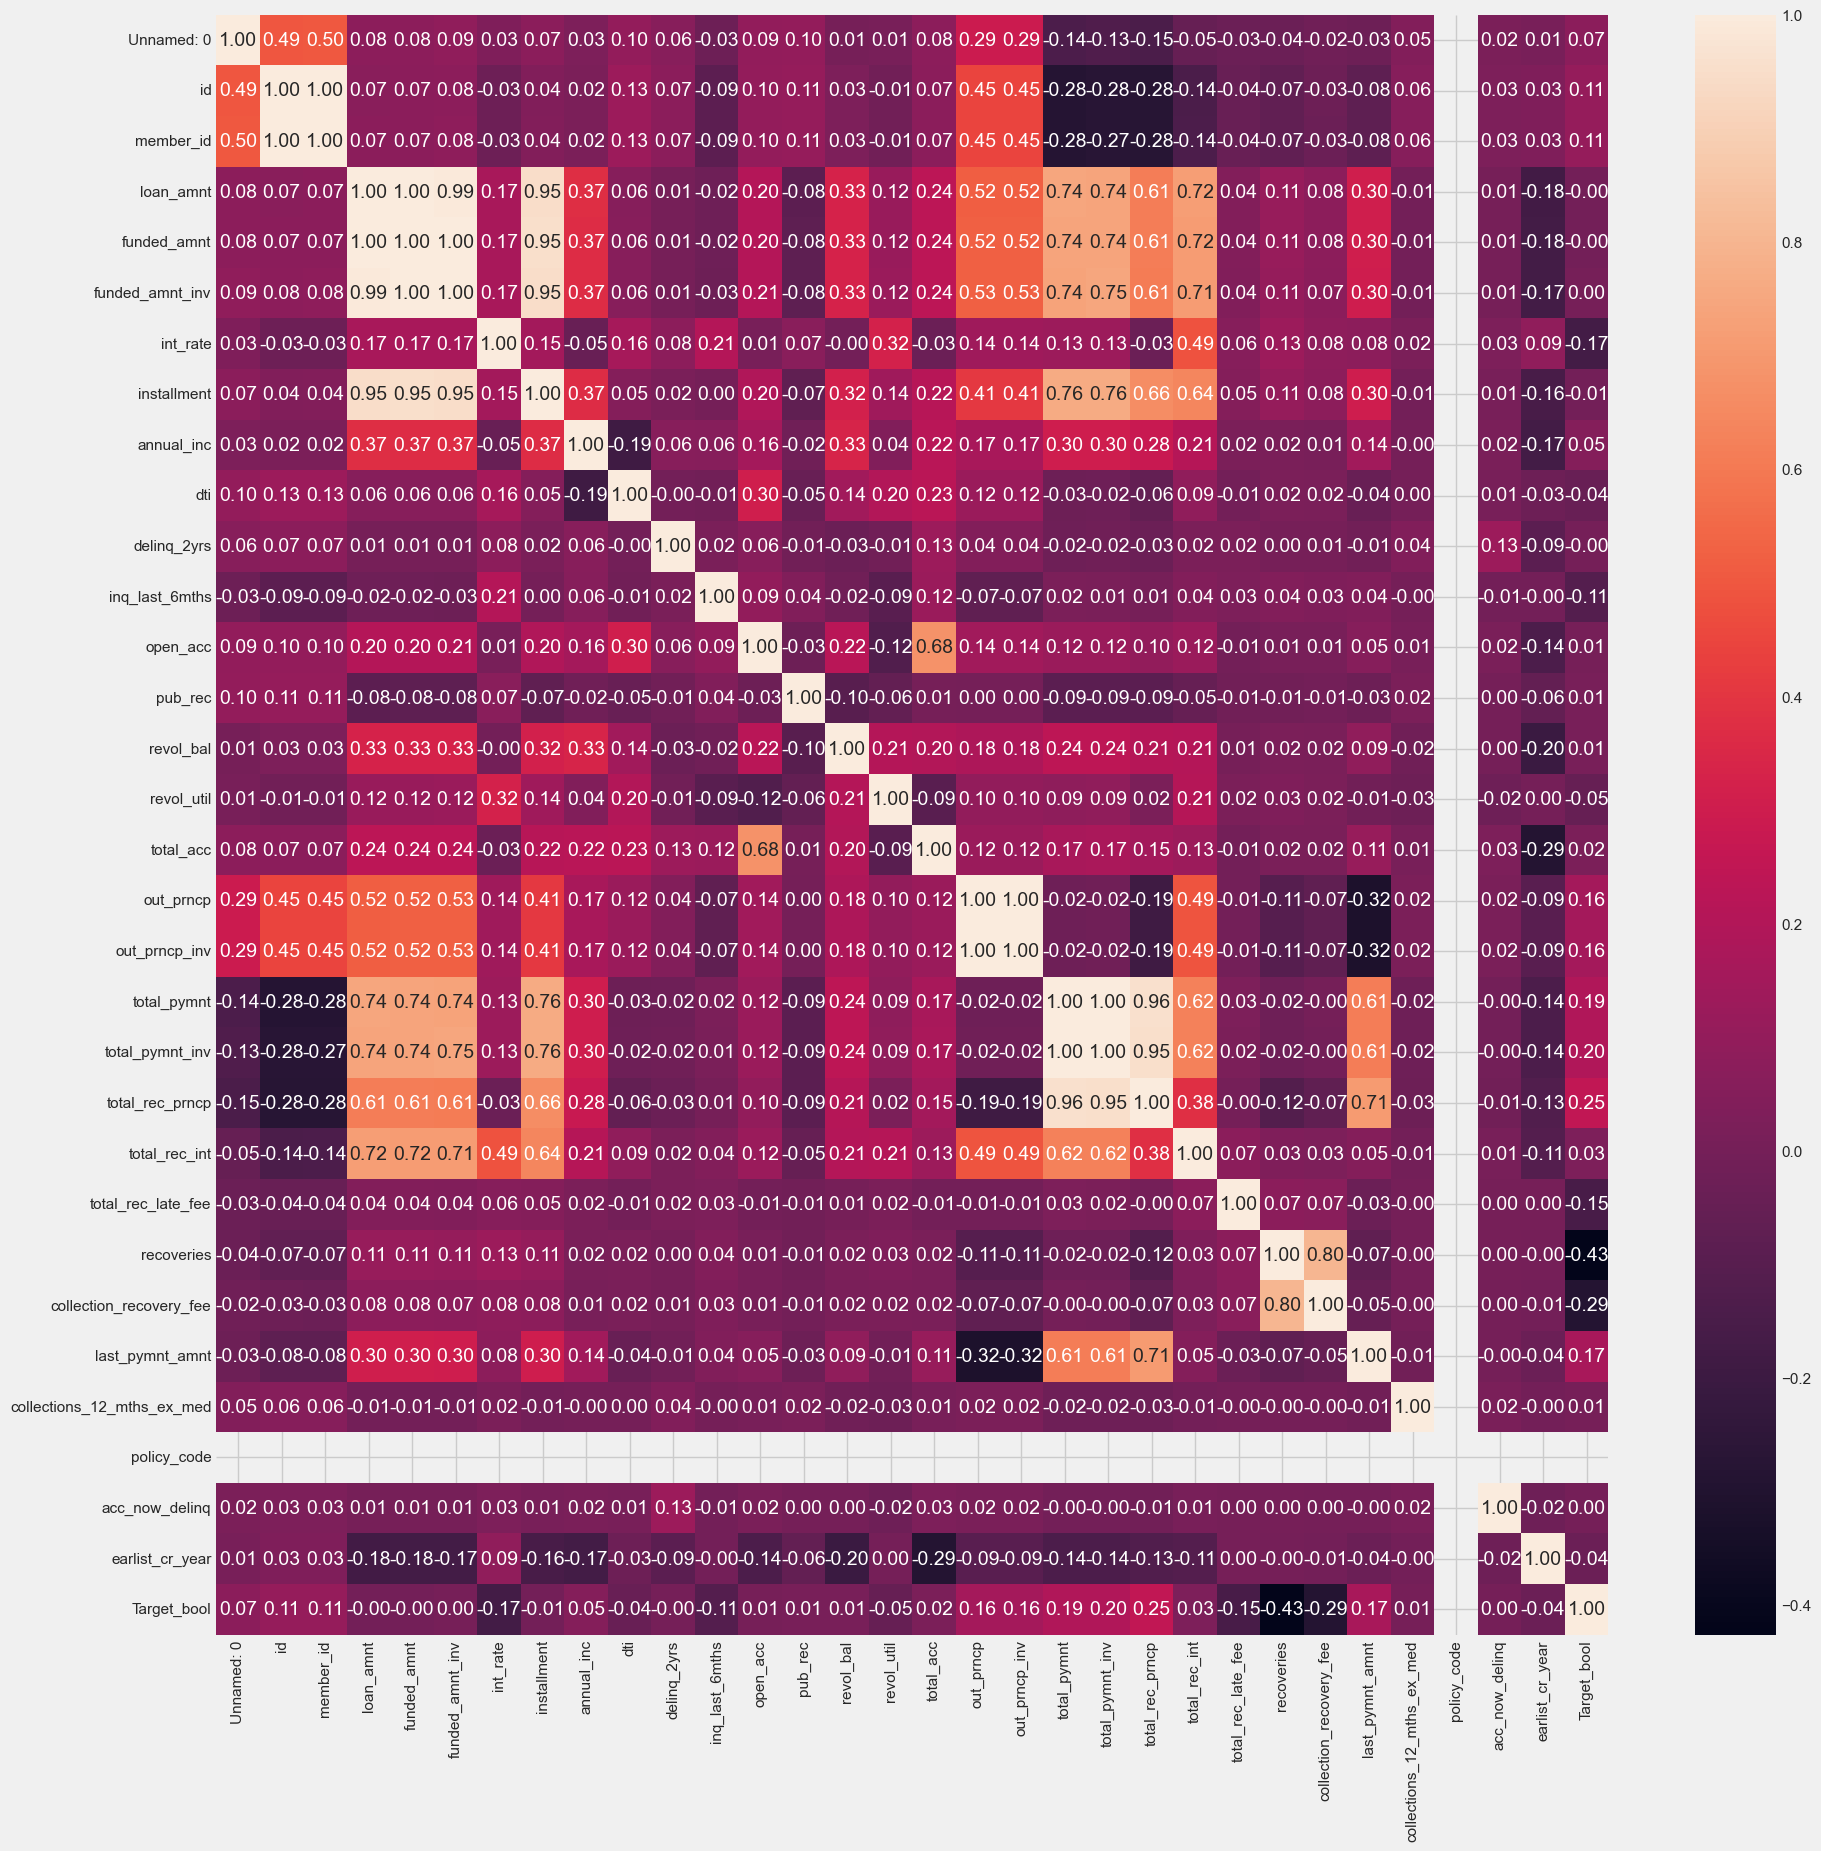

In [67]:
plt.figure(figsize=(20,20))
corr = df_loans3[list_col_num].corr()

sns.heatmap(corr, annot=True, fmt='.2f')

### INSIGHT:
- Factors regarding payment have the strongest positive relationship in determining whether a borrower will result in good loans or not. This suggests that a borrower's ability to make payments on the expected amount and within the allotted timeframe can significantly impact their creditworthiness.
- Interest rates given to borrowers reflect negatively on their trustworthiness regarding their ability to repay their loans. This negative relationship shows that the higher the interest rate given to borrowers, the less likely they are to result in good loans.
- Recovery rates have a negative relationship with the target variable, reaching -0.43, which is the highest negative value among all the other variables. This suggests that the lower the recovery rate, the more likely it is for the borrower to result in bad loans or experience difficulties in repaying their loans.

# Data Preprocessing

## Duplicate rows

In [71]:
df_loans.duplicated().sum()

0

- There is no duplicates found in the dataset.

## Missing Values

In [74]:
df_loans['Target'] = df_loans['loan_status'].apply(lambda x: 1 if x in ['Current', 'Fully Paid', 'In Grace Period'] else 0)
df_loans = df_loans.drop(columns=['loan_status'])

In [75]:
X = df_loans.drop(columns='Target', axis=1)
y = df_loans['Target']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 74), (93257, 74), (373028,), (93257,))

In [77]:
miscol_temp = pd.DataFrame(columns=['Columns','Num_train'])
miscol_temp_test = pd.DataFrame(columns=['Columns','Num_test'])

In [78]:
for col in X_train.columns:
    col_misval = round(X_train[col].isna().sum()/X_train.shape[0]*100,3)
    if col_misval > 0:
        miscol_temp.loc[len(miscol_temp)] = [col, col_misval]
        
for col in X_test.columns:
    col_misval = round((X_test[col].isna().sum()/X_test.shape[0])*100,3)
    if col_misval > 0:
        miscol_temp_test.loc[len(miscol_temp_test)] = [col, col_misval]

In [79]:
# merge the two dataset
merged_misval_df = pd.merge(miscol_temp, miscol_temp_test, on='Columns', how='inner').sort_values(by=['Num_train'], ascending=False)

filtered_keep = merged_misval_df[merged_misval_df['Num_train']<=10]
filtered_drop = merged_misval_df[merged_misval_df['Num_train']>10]

In [80]:
merged_misval_df['Columns'].value_counts().sum()

40

In [81]:
filtered_keep

Columns  Num_train  Num_test
0                    emp_title      5.893     6.012
1                   emp_length      4.476     4.624
14                last_pymnt_d      0.081     0.077
12                  revol_util      0.075     0.063
17  collections_12_mths_ex_med      0.033     0.023
16          last_credit_pull_d      0.010     0.005
10                    open_acc      0.006     0.006
13                   total_acc      0.006     0.006
7               inq_last_6mths      0.006     0.006
6             earliest_cr_line      0.006     0.006
5                  delinq_2yrs      0.006     0.006
22              acc_now_delinq      0.006     0.006
11                     pub_rec      0.006     0.006
4                        title      0.005     0.003
2                   annual_inc      0.001     0.001

#### Out of 40 columns with missing values, 15 columns have missing values that can be replaced.
- emp_title
- emp_length
- last_pymnt_d
- revol_util
- collections_12_mths_ex_med
- total_acc
- pub_rec
- open_acc
- last_credit_pull_d
- inq_last_6mths
- earliest_cr_line
- acc_now_delinq
- delinq_2yrs
- title
- annual_inc

In [83]:
filtered_drop_list = filtered_drop['Columns'].tolist()
X_train = X_train.drop(columns=filtered_drop_list)
X_test = X_test.drop(columns=filtered_drop_list)

In [84]:
# Missing values in columns with categorical values will be replaced with the most frequent value for that column.
for col in ['emp_title','emp_length','last_pymnt_d','last_credit_pull_d','earliest_cr_line','title']:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

In [85]:
# the missing values in columns 'pub_rec','acc_now_delinq','delinq_2yrs' is replaced by 0.
# The assumptions are that the borrower is clean, meaning they have no derogatory records, no delinquencies in their account, and have never been delinquent.
for col in ['pub_rec','acc_now_delinq','delinq_2yrs']:
    X_train[col] = X_train[col].fillna(0)
    X_test[col] = X_test[col].fillna(0)

In [86]:
# Missing values in these columns are replaced with their average values.
# The assumptions are that a typical borrower is expected to have values that do not deviate from the norm.
for col in ['revol_util','collections_12_mths_ex_med','total_acc','open_acc','inq_last_6mths','annual_inc']:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_test[col].mean())

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 49), (93257, 49), (373028,), (93257,))

In [88]:
num_listdf = X_train.select_dtypes(include='object')

In [89]:
num_listdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373028 entries, 401653 to 272265
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 373028 non-null  object
 1   grade                373028 non-null  object
 2   sub_grade            373028 non-null  object
 3   emp_title            373028 non-null  object
 4   emp_length           373028 non-null  object
 5   home_ownership       373028 non-null  object
 6   verification_status  373028 non-null  object
 7   issue_d              373028 non-null  object
 8   pymnt_plan           373028 non-null  object
 9   url                  373028 non-null  object
 10  purpose              373028 non-null  object
 11  title                373028 non-null  object
 12  zip_code             373028 non-null  object
 13  addr_state           373028 non-null  object
 14  earliest_cr_line     373028 non-null  object
 15  initial_list_status  373028 non-nu

In [90]:
num_listdf['grade'].value_counts()

grade
B    109717
C    100204
D     61444
A     59898
E     28539
F     10563
G      2663
Name: count, dtype: int64

In [91]:
drop_list = ['verification_status',
             'delinq_2yrs',
             'inq_last_6mths',
             'out_prncp',
             'total_rec_int',
             'total_rec_late_fee',
             'recoveries',
             'tot_coll_amt',
             'tot_cur_bal',
             'total_rev_hi_lim']

## Feature Transformation

In [93]:
X_train.shape, X_test.shape

((373028, 49), (93257, 49))

In [94]:
earliest_cr_year_train = X_train['earliest_cr_line'].mode()[0]
earliest_cr_year_test = X_test['earliest_cr_line'].mode()[0]

X_train['earlist_cr_year'] = pd.to_datetime(X_train['earliest_cr_line'], format='%b-%y').dt.year.clip(upper=2014)
X_test['earlist_cr_year'] = pd.to_datetime(X_test['earliest_cr_line'], format='%b-%y').dt.year.clip(upper=2014)

def credit_history_conversion(df):
    for index, rows in df.iterrows():
        credit_history = 2014 - rows['earlist_cr_year']
        if credit_history <= 2:
            df.at[index, 'credit_history'] = '0-2 years'
        elif credit_history <= 5:
            df.at[index, 'credit_history'] = '2-5 years'
        else:
            df.at[index, 'credit_history'] = '+5 years'

credit_history_conversion(X_train)
credit_history_conversion(X_test)

X_train = X_train.drop(columns=['earliest_cr_line', 'earlist_cr_year'])
X_test = X_test.drop(columns=['earliest_cr_line', 'earlist_cr_year'])

In [95]:
X_train['credit_history'].unique()

array(['+5 years', '2-5 years', '0-2 years'], dtype=object)

In [96]:
X_train['pymnt_plan'] = X_train['pymnt_plan'].apply(lambda x: True if x=='y' else False)
X_test['pymnt_plan'] = X_test['pymnt_plan'].apply(lambda x: True if x=='y' else False)

## Categorical Feature Selection

In [98]:
x_train_cat = X_train.select_dtypes(include='object')
x_train_cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'credit_history'],
      dtype='object')

In [99]:
#we choose chi-squared test because dataset doesn't have normal distribution
chi_2 = {}

#dictionary.setdefault(key, default_value)
#key: The key you want to look for in the dictionary.
#default_value: The value to be set for the key if the key is not present in the dictionary
for col in x_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, x_train_cat[col]))
    chi_2.setdefault('Feature',[]).append(col)
    chi_2.setdefault('p-value',[]).append(round(p,8))
    
#create dataframe from dictionary
df_chi_2 = pd.DataFrame(data=chi_2)

In [100]:
df_chi_2

Feature   p-value
0                  term  0.000000
1                 grade  0.000000
2             sub_grade  0.000000
3             emp_title  0.000000
4            emp_length  0.000000
5        home_ownership  0.000000
6   verification_status  0.000000
7               issue_d  0.000000
8                   url  0.499230
9               purpose  0.000000
10                title  0.000000
11             zip_code  0.000000
12           addr_state  0.000000
13  initial_list_status  0.000000
14         last_pymnt_d  0.000000
15   last_credit_pull_d  0.000000
16     application_type  1.000000
17       credit_history  0.012968

In [101]:
#extract unique for categorical column
cat_unique = x_train_cat.describe().T.reset_index()
cat_unique.rename(columns={'index':'Feature'}, inplace=True)

In [102]:
#merge 2 dataset
merge_chi_2 = pd.merge(df_chi_2, cat_unique, on='Feature', how='inner').sort_values(by=['p-value', 'unique'])

#display merge dataset
merge_chi_2

Feature   p-value   count  unique  \
0                  term  0.000000  373028       2   
13  initial_list_status  0.000000  373028       2   
6   verification_status  0.000000  373028       3   
5        home_ownership  0.000000  373028       6   
1                 grade  0.000000  373028       7   
4            emp_length  0.000000  373028      11   
9               purpose  0.000000  373028      14   
2             sub_grade  0.000000  373028      35   
12           addr_state  0.000000  373028      50   
7               issue_d  0.000000  373028      91   
14         last_pymnt_d  0.000000  373028      98   
15   last_credit_pull_d  0.000000  373028     103   
11             zip_code  0.000000  373028     882   
10                title  0.000000  373028   52166   
3             emp_title  0.000000  373028  170376   
17       credit_history  0.012968  373028       3   
8                   url  0.499230  373028  373028   
16     application_type  1.000000  373028       1   

                                                  top    freq  
0                                           36 months  270525  
13                                                  f  242420  
6                                            Verified  134360  
5                                            MORTGAGE  188741  
1                                                   B  109717  
4                                           10+ years  136632  
9                                  debt_consolidation  219677  
2                                                  B3   25362  
12                                                 CA   57162  
7                                              Oct-14   30890  
14                                             Jan-16  144142  
15                                             Jan-16  262065  
11                                              945xx    4266  
10                                 Debt consolidation  131629  
3                                             Teacher   26280  
17                                           +5 years  366090  
8   https://www.lendingclub.com/browse/loanDetail....       1  
16                                         INDIVIDUAL  373028

- Drop url, because it has a p-value > 0.05 and high cardinality.
- Drop addr_state, issue_d, last_pymnt_d, last_credit_pull_d, zip_code, title, emp_title, because they have a very high cardinality.
- Drop application_type because it has only one unique value.

In [104]:
X_train = X_train.drop(columns=['url','addr_state','issue_d','last_pymnt_d','last_credit_pull_d','zip_code','title','emp_title','application_type'])
X_test = X_test.drop(columns=['url','addr_state','issue_d','last_pymnt_d','last_credit_pull_d','zip_code','title','emp_title','application_type'])

selected_cat_list = X_train.select_dtypes(include='object').columns.to_list()

## Numerical Feature Selection

In [106]:
# Create new dataframe without column with dtypes 'object'
x_train_num = X_train.select_dtypes(exclude='object')
x_train_num.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq'],
      dtype='object')

In [107]:
# Use ANOVA to get the p-value
F_statistic, p_values = f_classif(x_train_num, y_train)

#create dataframe 
df_anova = pd.DataFrame(data= {'Numerical Feature':x_train_num.columns.values,
                                'p-value': p_values.round(5)})

df_anova.shape

(31, 2)

In [108]:
df_anova

Numerical Feature  p-value
0                   Unnamed: 0  0.00000
1                           id  0.00000
2                    member_id  0.00000
3                    loan_amnt  0.00016
4                  funded_amnt  0.00173
5              funded_amnt_inv  0.22538
6                     int_rate  0.00000
7                  installment  0.00000
8                   annual_inc  0.00000
9                   pymnt_plan  0.00074
10                         dti  0.00000
11                 delinq_2yrs  0.04996
12              inq_last_6mths  0.00000
13                    open_acc  0.00000
14                     pub_rec  0.00000
15                   revol_bal  0.00000
16                  revol_util  0.00000
17                   total_acc  0.00000
18                   out_prncp  0.00000
19               out_prncp_inv  0.00000
20                 total_pymnt  0.00000
21             total_pymnt_inv  0.00000
22             total_rec_prncp  0.00000
23               total_rec_int  0.00000
24          total_rec_late_fee  0.00000
25                  recoveries  0.00000
26     collection_recovery_fee  0.00000
27             last_pymnt_amnt  0.00000
28  collections_12_mths_ex_med  0.00860
29                 policy_code      NaN
30              acc_now_delinq  0.68565

In [109]:
#filter only column that has p-value < 0.05
temp_num_cols = df_anova[df_anova['p-value']<0.05]['Numerical Feature'].tolist()

print(f'Number of excluded columns: {len(df_anova)-len(temp_num_cols)}')

temp_num_cols

Number of excluded columns: 3


['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'pymnt_plan',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med']

- 3 features are dropped because their p-value is more than the 0.05 threshold criterion.

<Axes: >

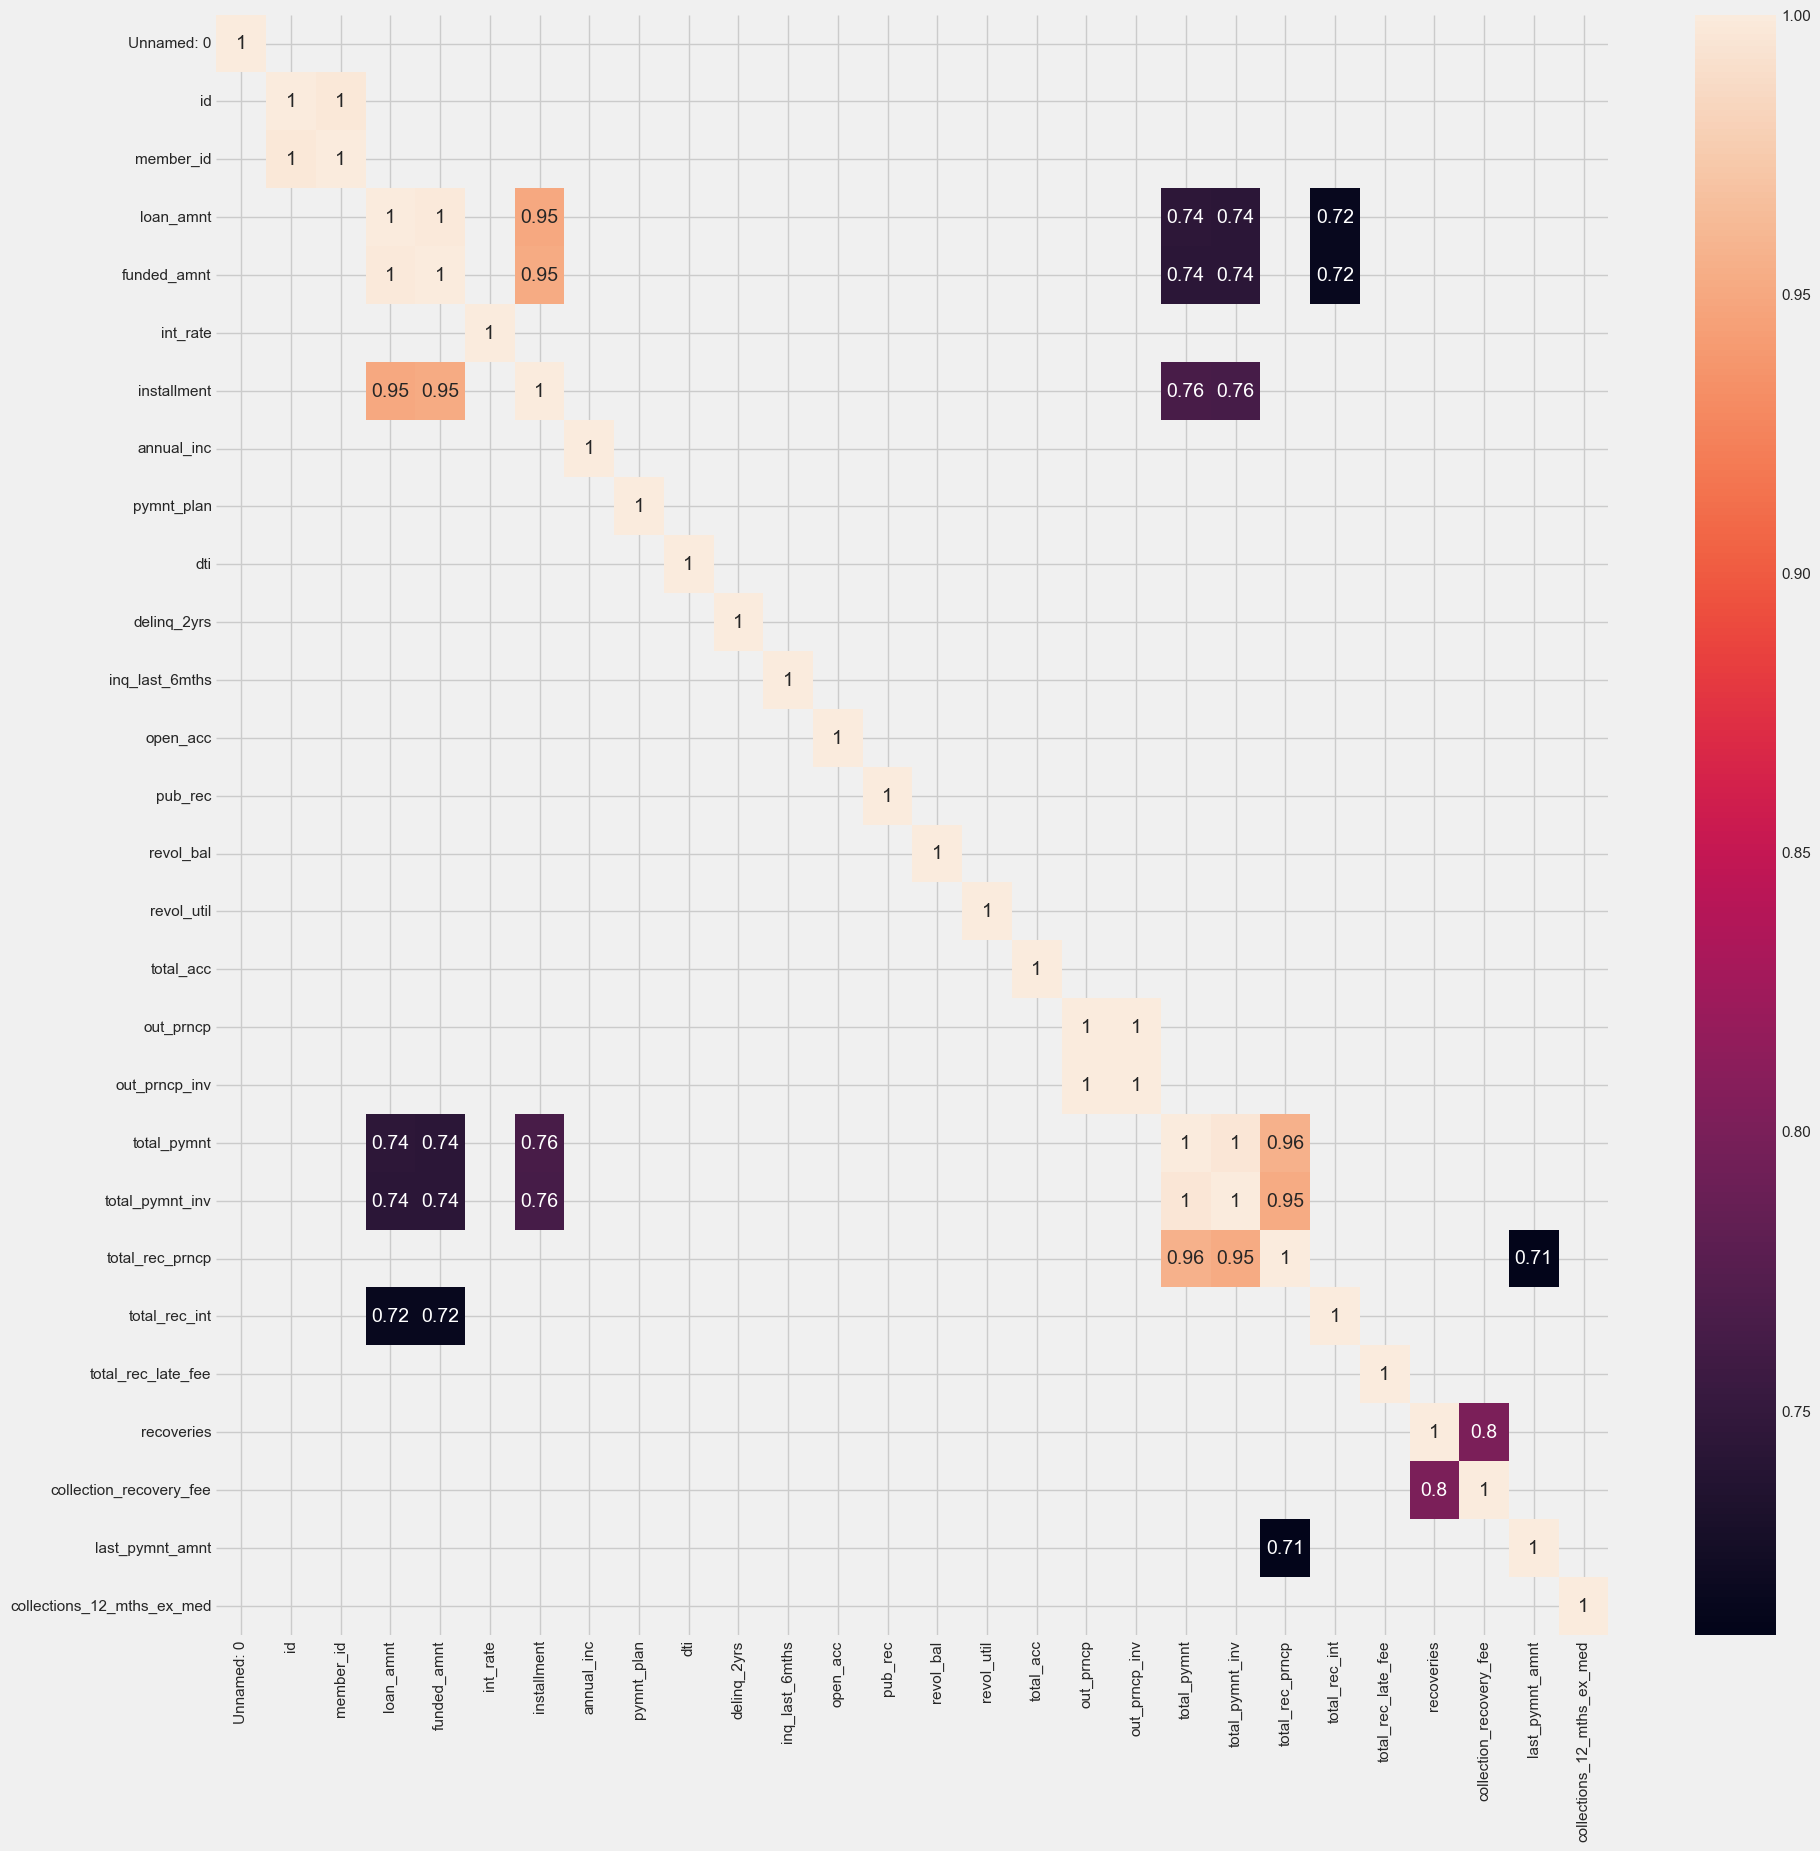

In [111]:
#select only the columns with correlation < 0.7
corr = X_train[temp_num_cols].corr()
fig = plt.figure(figsize=(20,20))

# create heatmap to show correlation between features
sns.heatmap(corr, annot=True, mask=(abs(corr)<=0.7))

In [112]:
#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype = bool), k=1))

In [113]:
corr_selected_col = [col for col in mask.columns if any (mask[col] < 0.7)]

print(f'Number of excluded columns: {len(temp_num_cols)-len(corr_selected_col)}')

corr_selected_col

Number of excluded columns: 1


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'pymnt_plan',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med']

- 1 features (Unnamed: 0) are dropped because their correlation value is less than the 0.7 threshold criterion.

In [115]:
selected_features = corr_selected_col + selected_cat_list

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [116]:
X_train.shape, X_test.shape

((373028, 36), (93257, 36))

## Encoding

### One-Hot Encoding
- Categorical columns are encoded using one-hot encoding to convert them into numerical columns with values of 0 and 1.

In [119]:
X_train.select_dtypes(include='object').describe().T

count unique                 top    freq
term                 373028      2           36 months  270525
grade                373028      7                   B  109717
sub_grade            373028     35                  B3   25362
emp_length           373028     11           10+ years  136632
home_ownership       373028      6            MORTGAGE  188741
verification_status  373028      3            Verified  134360
purpose              373028     14  debt_consolidation  219677
initial_list_status  373028      2                   f  242420
credit_history       373028      3            +5 years  366090

In [120]:
columns_to_encode = X_train.select_dtypes(include='object').columns
columns_to_encode = columns_to_encode.drop(['grade', 'sub_grade']) # 'grade' and 'sub_grade' are excluded due to their ordinal values

In [121]:
columns_to_encode

Index(['term', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'credit_history'],
      dtype='object')

In [122]:
X_train.select_dtypes(include='object').describe().T

count unique                 top    freq
term                 373028      2           36 months  270525
grade                373028      7                   B  109717
sub_grade            373028     35                  B3   25362
emp_length           373028     11           10+ years  136632
home_ownership       373028      6            MORTGAGE  188741
verification_status  373028      3            Verified  134360
purpose              373028     14  debt_consolidation  219677
initial_list_status  373028      2                   f  242420
credit_history       373028      3            +5 years  366090

In [123]:
from sklearn.preprocessing import OneHotEncoder

X_train_to_encode = X_train[columns_to_encode]
X_train_rest = X_train.drop(columns=columns_to_encode)

X_test_to_encode = X_test[columns_to_encode]
X_test_rest = X_test.drop(columns=columns_to_encode)

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

encoder.fit(X_train_to_encode)

X_train_encoded = encoder.transform(X_train_to_encode).toarray()
X_test_encoded = encoder.transform(X_test_to_encode).toarray()

encoded_columns = encoder.get_feature_names_out(columns_to_encode)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train_enc = pd.concat([X_train_rest, X_train_encoded_df], axis=1)
X_test_enc = pd.concat([X_test_rest, X_test_encoded_df], axis=1)

In [124]:
X_train.shape, X_test.shape, X_train_enc.shape, X_test_enc.shape

((373028, 36), (93257, 36), (373028, 63), (93257, 63))

In [125]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373028 entries, 401653 to 272265
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   373028 non-null  int64  
 1   member_id                            373028 non-null  int64  
 2   loan_amnt                            373028 non-null  int64  
 3   funded_amnt                          373028 non-null  int64  
 4   int_rate                             373028 non-null  float64
 5   installment                          373028 non-null  float64
 6   annual_inc                           373028 non-null  float64
 7   pymnt_plan                           373028 non-null  bool   
 8   dti                                  373028 non-null  float64
 9   delinq_2yrs                          373028 non-null  float64
 10  inq_last_6mths                       373028 non-null  float64
 11  open_acc     

### Label Encoder
- Label encoder is used for 'grade' and 'sub_grade' due to their ordinal values.

In [127]:
def merged_df_temp(df1, df2, col):
    df_merge_grp = df1.groupby(col).agg(cust_cnt_train=(col,'count')).sort_values('cust_cnt_train', ascending=False)
    df_merge_grp.reset_index(inplace=True)
    
    df_merge_grp2 = df2.groupby(col).agg(cust_cnt_test=(col,'count')).sort_values('cust_cnt_test', ascending=False)
    df_merge_grp2.reset_index(inplace=True)
    
    merged_df = pd.merge(df_merge_grp, df_merge_grp2, on=col, how='outer').sort_values(by=['cust_cnt_train'], ascending=False)
    
    return merged_df

In [128]:
df_grade = merged_df_temp(X_train_enc, X_test_enc, 'grade')
df_grade.sort_values('grade', ascending=True)

grade  cust_cnt_train  cust_cnt_test
0     A           59898          14969
1     B          109717          27212
2     C          100204          25089
3     D           61444          15444
4     E           28539           7218
5     F           10563           2666
6     G            2663            659

In [129]:
df_grade = merged_df_temp(X_train_enc, X_test_enc, 'sub_grade')
df_grade.sort_values('sub_grade', ascending=True)

sub_grade  cust_cnt_train  cust_cnt_test
0         A1            8514           2027
1         A2            8781           2175
2         A3           10052           2516
3         A4           15241           3804
4         A5           17310           4447
5         B1           18337           4539
6         B2           21432           5178
7         B3           25362           6324
8         B4           24405           6100
9         B5           20181           5071
10        C1           21474           5479
11        C2           21456           5284
12        C3           20166           5151
13        C4           19336           4769
14        C5           17772           4406
15        D1           15369           3892
16        D2           13640           3406
17        D3           11894           3022
18        D4           11285           2814
19        D5            9256           2310
20        E1            7249           1784
21        E2            6894           1775
22        E3            5523           1453
23        E4            4776           1216
24        E5            4097            990
25        F1            3138            802
26        F2            2379            622
27        F3            2190            518
28        F4            1634            433
29        F5            1222            291
30        G1             887            222
31        G2             657            166
32        G3             480            103
33        G4             326             96
34        G5             313             72

In [130]:
label_encoder = LabelEncoder()

X_train_enc['grade_encoded'] = label_encoder.fit_transform(X_train_enc['grade'])
X_test_enc['grade_encoded'] = label_encoder.fit_transform(X_test_enc['grade'])

X_train_enc['sub_grade_encoded'] = label_encoder.fit_transform(X_train_enc['sub_grade'])
X_test_enc['sub_grade_encoded'] = label_encoder.fit_transform(X_test_enc['sub_grade'])

X_train_enc = X_train_enc.drop(columns=['grade','sub_grade'])
X_test_enc = X_test_enc.drop(columns=['grade','sub_grade'])

In [131]:
df_grade = merged_df_temp(X_train_enc, X_test_enc, 'grade_encoded')
df_grade.sort_values('grade_encoded', ascending=True)

grade_encoded  cust_cnt_train  cust_cnt_test
0              0           59898          14969
1              1          109717          27212
2              2          100204          25089
3              3           61444          15444
4              4           28539           7218
5              5           10563           2666
6              6            2663            659

In [132]:
df_grade = merged_df_temp(X_train_enc, X_test_enc, 'sub_grade_encoded')
df_grade.sort_values('sub_grade_encoded', ascending=True)

sub_grade_encoded  cust_cnt_train  cust_cnt_test
0                   0            8514           2027
1                   1            8781           2175
2                   2           10052           2516
3                   3           15241           3804
4                   4           17310           4447
5                   5           18337           4539
6                   6           21432           5178
7                   7           25362           6324
8                   8           24405           6100
9                   9           20181           5071
10                 10           21474           5479
11                 11           21456           5284
12                 12           20166           5151
13                 13           19336           4769
14                 14           17772           4406
15                 15           15369           3892
16                 16           13640           3406
17                 17           11894           3022
18                 18           11285           2814
19                 19            9256           2310
20                 20            7249           1784
21                 21            6894           1775
22                 22            5523           1453
23                 23            4776           1216
24                 24            4097            990
25                 25            3138            802
26                 26            2379            622
27                 27            2190            518
28                 28            1634            433
29                 29            1222            291
30                 30             887            222
31                 31             657            166
32                 32             480            103
33                 33             326             96
34                 34             313             72

In [133]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373028 entries, 401653 to 272265
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   373028 non-null  int64  
 1   member_id                            373028 non-null  int64  
 2   loan_amnt                            373028 non-null  int64  
 3   funded_amnt                          373028 non-null  int64  
 4   int_rate                             373028 non-null  float64
 5   installment                          373028 non-null  float64
 6   annual_inc                           373028 non-null  float64
 7   pymnt_plan                           373028 non-null  bool   
 8   dti                                  373028 non-null  float64
 9   delinq_2yrs                          373028 non-null  float64
 10  inq_last_6mths                       373028 non-null  float64
 11  open_acc     

## Handling Outliers

In [135]:
df_outlier_train = pd.DataFrame(columns=['Features','Train_upper_outlier'])
df_outlier_test = pd.DataFrame(columns=['Features','Test_upper_outlier'])

In [136]:
def calculate_outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_percentage = (len(outliers) / len(series)) * 100
    
    return outlier_percentage

In [137]:
def outliers(df):
    outlier_percentages = {}
    for col in df.select_dtypes(exclude='bool').columns:
        outlier_percentages[col] = calculate_outlier_percentage(df[col])
    
    # Convert to a DataFrame for easier viewing
    outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage']).sort_values('Outlier Percentage', ascending=False)
    outlier_df.reset_index(inplace=True)
    outlier_df.rename(columns={'index': 'Features'}, inplace=True)

    return outlier_df

train_outliers = outliers(X_train_enc)
test_outliers = outliers(X_test_enc)

In [138]:
binary_columns = [col for col in X_train_enc.columns if X_train_enc[col].isin([0, 1]).all()]
numerical_columns = [col for col in X_train_enc.columns if col not in binary_columns and col in selected_features]

merged_outlier_df = pd.merge(train_outliers, test_outliers, on='Features', how='inner').sort_values(by=['Outlier Percentage_x'], ascending=False)
merged_outlier_df = merged_outlier_df[merged_outlier_df['Features'].isin(numerical_columns) & (merged_outlier_df['Outlier Percentage_y']>0)]
merged_outlier_df.round(2)

Features  Outlier Percentage_x  Outlier Percentage_y
1                  delinq_2yrs                 17.88                 17.79
2              last_pymnt_amnt                 15.05                 15.19
3                      pub_rec                 13.15                 13.19
6               inq_last_6mths                  7.90                  7.86
9                total_rec_int                  6.69                  6.71
15                  recoveries                  5.26                  5.10
17               out_prncp_inv                  5.03                  4.98
18                   out_prncp                  5.02                  4.96
19     collection_recovery_fee                  5.00                  4.87
20                   revol_bal                  4.91                  4.91
22             total_rec_prncp                  4.43                  4.42
23                  annual_inc                  4.26                  4.19
24             total_pymnt_inv                  4.10                  4.04
25                 total_pymnt                  4.09                  4.00
27                 installment                  2.53                  2.43
28          total_rec_late_fee                  2.30                  2.25
29                    open_acc                  2.22                  2.32
31                   total_acc                  1.84                  1.93
34                    int_rate                  1.05                  1.04
37  collections_12_mths_ex_med                  0.88                  0.84
48                  revol_util                  0.00                  0.00

In [139]:
X_train_enc[numerical_columns] = X_train_enc[numerical_columns].apply(lambda x: np.log1p(x))
X_test_enc[numerical_columns] = X_test_enc[numerical_columns].apply(lambda x: np.log1p(x))

In [140]:
train_outliers_transformed = outliers(X_train_enc)
test_outliers_transformed  = outliers(X_test_enc)

In [141]:
# merge the two dataset
merged_outlier_df_scaled = pd.merge(train_outliers_transformed, test_outliers_transformed, on='Features', how='inner').sort_values(by=['Outlier Percentage_x'], ascending=False)

merged_outlier_df_scaled = merged_outlier_df_scaled[(merged_outlier_df_scaled['Features'].isin(numerical_columns)) & (merged_outlier_df_scaled['Outlier Percentage_y']>5)]

In [142]:
merged_outlier_df_scaled.round(2)

Features  Outlier Percentage_x  Outlier Percentage_y
1   delinq_2yrs                 17.88                 17.79
2       pub_rec                 13.15                 13.19
12   recoveries                  5.26                  5.10
13   revol_util                  5.22                  5.20

### Note:
- There are only 4 features left with outliers after using log transformation
- The outliers withing the remaining features will be solved by using winsorization

In [144]:
from scipy.stats.mstats import winsorize

for col in merged_outlier_df_scaled['Features']:
    X_train_enc[col] = winsorize(X_train_enc[col], limits=[0.25, 0.25])
    X_test_enc[col] = winsorize(X_test_enc[col], limits=[0.25, 0.25])

In [145]:
perc_outlier_transformed = pd.DataFrame(columns=['Features','Train_outlier_percentages','Test_outlier_percentages'])

In [146]:
for index, row in merged_outlier_df_scaled.iterrows():
    train_outlier_val = row['Outlier Percentage_x']
    test_outlier_val = row['Outlier Percentage_y']
    
    train_outlier_count = X_train_enc[row['Features']] > train_outlier_val
    test_outlier_count = X_test_enc[row['Features']] > test_outlier_val
    
    train_outlier_percentage = round(train_outlier_count.sum()/len(X_train_enc)*100,2)
    test_outlier_percentage = round(test_outlier_count.sum()/len(X_test_enc)*100,2)

    if train_outlier_percentage > 0 and test_outlier_percentage > 0:
        perc_outlier_transformed.loc[len(perc_outlier_transformed)] = [row['Features'], train_outlier_percentage, test_outlier_percentage]

In [147]:
perc_outlier_transformed.sort_values('Train_outlier_percentages', ascending=False)

Empty DataFrame
Columns: [Features, Train_outlier_percentages, Test_outlier_percentages]
Index: []

#### Notes:
- There are no features outside the acceptable percentages of outliers left after using winsorization.
- By applying winsorization with the 25th and 75th percentile limits, this means that any values below the 25th percentile will be replaced with the value at the 25th percentile, and any values above the 75th percentile will be replaced with the value at the 75th percentile

## SMOTE
- Oversampling technique that helps to improve the performance of machine learning models by balancing the class distribution, particularly useful when the minority class is underrepresented.
- SMOTE works by creating synthetic examples from the minority class by interpolating between existing minority class instances.

In [150]:
from imblearn.over_sampling import SMOTE
# Minority class is left at 75% of the majority class, this is done to mimic the nature and the original distribution of the dataset.
smt = SMOTE(random_state =2, sampling_strategy=0.75)

X_train_smote, y_train_smote = smt.fit_resample(X_train_enc, y_train)

In [151]:
#display row and column for data smote & data test
X_train_smote.shape, X_train_enc.shape, y_train_smote.shape, y_train.shape, y_test.shape, X_test_enc.shape

((576955, 63), (373028, 63), (576955,), (373028,), (93257,), (93257, 63))

# Modelling

## Without SMOTE

In [154]:
def class_report(y_proba, y_true):
    y_pred_class = [1 if val > 0.5 else 0 for val in y_proba]
    
    report = classification_report(y_true, y_pred_class, output_dict=True)
    
    recall_score = report['1']['recall']
    
    print(classification_report(y_true, y_pred_class))
    conf_matrix(y_true, y_pred_class)
    
    return recall_score

def conf_matrix(y_true, y_pred_class):
    conf_matrix = confusion_matrix(y_true, y_pred_class)
    print(f"Test data Confusion Matrix:")
    print(conf_matrix, '\n')

ml_model = {
    'Logistic Regression': LogisticRegression(random_state=2),
    'Decision Tree': DecisionTreeClassifier(random_state=2),
    'Linear SVC':LinearSVC(random_state=2),
    'Random Forest': RandomForestClassifier(random_state=2),
    'Catboost': CatBoostClassifier(random_seed=2, verbose=False)
}

recall_df = pd.DataFrame(columns=['Model', 'AUC_vanilla', 'Recall_vanilla'])

for model_name, model_used in ml_model.items():
    model_used.fit(X_train_enc, y_train)

    if model_name == 'Linear SVC':
        y_pred_proba_train = model_used.decision_function(X_train_enc)
        y_pred_proba_test = model_used.decision_function(X_test_enc)
    else:
        y_pred_proba_train = model_used.predict_proba(X_train_enc)[:, 1]
        y_pred_proba_test = model_used.predict_proba(X_test_enc)[:, 1]

    test_AUC_vanilla = roc_auc_score(y_true=y_test, y_score=y_pred_proba_test).round(2)
    
    print(f'{model_name} AUC train probability: ', roc_auc_score(y_true=y_train, y_score=y_pred_proba_train).round(4))
    print(f'{model_name} AUC test probability: ', test_AUC_vanilla)
    
    recall_score = class_report(y_pred_proba_test, y_test)
    
    temp_df = pd.DataFrame({'Model': [model_name], 'AUC_vanilla': [test_AUC_vanilla], 'Recall_vanilla': [round(recall_score,4)]})
    recall_df = pd.concat([recall_df, temp_df], ignore_index=True)

Logistic Regression AUC train probability:  0.9574
Logistic Regression AUC test probability:  0.96
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     10835
           1       0.97      1.00      0.98     82422

    accuracy                           0.97     93257
   macro avg       0.97      0.88      0.92     93257
weighted avg       0.97      0.97      0.97     93257

Test data Confusion Matrix:
[[ 8282  2553]
 [  187 82235]] 

Decision Tree AUC train probability:  1.0
Decision Tree AUC test probability:  0.94
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     10835
           1       0.99      0.99      0.99     82422

    accuracy                           0.97     93257
   macro avg       0.94      0.94      0.94     93257
weighted avg       0.97      0.97      0.97     93257

Test data Confusion Matrix:
[[ 9608  1227]
 [ 1202 81220]] 

Linear SVC AUC train probability:  0.9622

### INSIGHT:
- Recall will be used to evaluate the model, as it measures the model's ability to correctly identify all positive instances (1) or borrowers who actually resulted in good loans.
- Precision will also be used, as it measures the model's ability to avoid incorrectly predicting bad loans (0) as good loans (1). This is because failing to identify those who may result in bad loans could be more costly than the potential loss of revenue.
- There is not much large of a gap between the positive instances (1) and negative instances (0) accross the evaluation metrics. This would suggest either a minimum variance in the dataset or a bias in the models. This will be tested by using a sampled data with a fairly balance distribution to find out wether there will be performance increase or not.

## With SMOTE

5 initial classification models are used with default paramaters:
- Logistic Regression
- Decision Tree
- Linear SVC
- Random Forest
- Catboost

In [158]:
recall_df_smote = pd.DataFrame(columns=['Model','AUC_smote','Recall_smote'])

for model_name, model_used in ml_model.items():
    model_used.fit(X_train_smote, y_train_smote)

    if model_name == 'Linear SVC':
        y_pred_proba_train = model_used.decision_function(X_train_smote)
        y_pred_proba_test = model_used.decision_function(X_test_enc)

    else:
    
        y_pred_proba_train = model_used.predict_proba(X_train_smote)[:][:,1]
        y_pred_proba_test = model_used.predict_proba(X_test_enc)[:][:,1]
        
    test_AUC = roc_auc_score(y_true= y_test , y_score= y_pred_proba_test).round(2)
    
    print(f'{model_name} AUC train probability: ', roc_auc_score(y_true= y_train_smote , y_score= y_pred_proba_train).round(4))
    print(f'{model_name} AUC test probability: ', test_AUC)

    recall_score_smote = class_report(y_pred_proba_test, y_test)
    
    temp_df_smote = pd.DataFrame({'Model': [model_name], 'AUC_smote': [test_AUC], 'Recall_smote': [round(recall_score_smote,4)]})
    recall_df_smote = pd.concat([recall_df_smote, temp_df_smote], ignore_index=True)

Logistic Regression AUC train probability:  0.9664
Logistic Regression AUC test probability:  0.96
              precision    recall  f1-score   support

           0       0.78      0.85      0.82     10835
           1       0.98      0.97      0.97     82422

    accuracy                           0.96     93257
   macro avg       0.88      0.91      0.90     93257
weighted avg       0.96      0.96      0.96     93257

Test data Confusion Matrix:
[[ 9204  1631]
 [ 2529 79893]] 

Decision Tree AUC train probability:  1.0
Decision Tree AUC test probability:  0.92
              precision    recall  f1-score   support

           0       0.77      0.87      0.82     10835
           1       0.98      0.97      0.97     82422

    accuracy                           0.96     93257
   macro avg       0.88      0.92      0.90     93257
weighted avg       0.96      0.96      0.96     93257

Test data Confusion Matrix:
[[ 9432  1403]
 [ 2741 79681]] 

Linear SVC AUC train probability:  0.974


#### Notes:
#### AUC
- AUC (Area Under Curve) according to (Narkhede, 2018) is a performance measurement or metric used to evaluate the performance of classification models.
- Higher AUC value indicates better class separation, as the model is able to distinguish between the positive and negative classes more effectively.
- AUC > 0.8: Generally is considered a good performance.
- AUC > 0.9: Is considered a very good performance.
- AUC < 0.5: Indicates the model performs no better than random.

#### Confusion matrix
To maximize revenue using the prediction results, it's generally better to consider both true positives (borrowers correctly predicted with good loans) and false negatives (borrowers incorrectly predicted with bad loans), while also avoiding loss by minimizing false positive (borrowers incorrectly predicted with good loans). This would helps in avoiding potential losses on paying customers while also potentially converting non-paying customer to paying customer.

#### INSIGHT:
- On average, the five models can identify borrowwer who with good loans (1) with high confidence of 98.4% precision on average. The top performing models, Logistic Regression, Random Forest, and Catboost, achieve slightly better results all around compared the the rest of the models. These models also excel at identifying and distinguishing between the those with good loans (1) and and those with bad loans (0), evidence by their high AUC score of 98% on average with test data.
- All models except Linear SVC have recall score above average (greater than 0.95). This indicates that the models mostly were able to identify a good portion of borrowers who actually have good loans status.
- The top performing models, Logistic Regression, Random Forest, and Catboost manages to have a high f1-score on positive class (1) which indicates the harmonized score between precision and recall of the models manages to correctly identifies a good portion visitor that would have good loans.
- Across all models, the accuracy scores are good and consistent, with an average of 94.4%. This suggests that the models are generally effective at making accurate predictions, although the top performers excel slightly more in this area with each are well above the total average.
- The true positive to false negative ratio on two of the top performing models shows that, potentially, the models can identify paying customers (TP) up to 4.8 times more often than they miss them (FN). This suggests a strong ability to capture potential revenue while minimizing potential loss.

## Model Performance

In [162]:
model_order = ['Logistic Regression', 'Decision Tree', 'Linear SVC', 'Random Forest', 'Catboost']

merged_recall = pd.merge(recall_df, recall_df_smote, on='Model', how='outer')

# Convert the 'Month' column to a categorical type with the specified order
merged_recall['Model'] = pd.Categorical(merged_recall['Model'], categories=model_order, ordered=True)

# Now sort the DataFrame by the 'Month' column
merged_recall = merged_recall.sort_values('Model')
merged_recall

Model  AUC_vanilla  Recall_vanilla  AUC_smote  Recall_smote
3  Logistic Regression         0.96          0.9977       0.96        0.9693
1        Decision Tree         0.94          0.9854       0.92        0.9667
2           Linear SVC         0.96          0.9818       0.97        0.8323
4        Random Forest         0.99          0.9997       0.99        0.9986
0             Catboost         0.99          0.9978       0.99        0.9969

## Notes:
- The model's performance based on their recall score does not improve much, but instead lessen the gap between the positive and negative clas, suggesting that it is slightly better at identifying the positive class and differentiating between classes with a balanced distribution.

## Hypertuning

Based on the evaluation results of five different classification models, considering the scores for precision, recall, and accuracy, it has been determined that the following models are the three top-performing models that will be hypertuned:
- Logistic Regression
- Random Forest
- Catboost

In [166]:
def class_report_train(y_proba, y_true):
    y_pred_class = [1 if val > 0.5 else 0 for val in y_proba]
    
    # Generate the classification report as a dictionary
    report = classification_report(y_true, y_pred_class, output_dict=True)
    
    # Extract the recall score for class '1'
    recall_score = report['1']['recall']
    
    return recall_score

In [167]:
List_param = [
                {
                'penalty': ['l1', 'l2'],
                'C': [0.001, 0.01, 0.1, 1, 10],
                'solver': ['lbfgs','newton-cg', 'saga'],
                'class_weight': [None, 'balanced']
                }, 
                {
                'max_depth': [5, 10],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
                },
                {
                'iterations': [100, 200],
                'depth': [6, 8, 10],
                'l2_leaf_reg': [1, 3, 5],
                'bagging_temperature': [0.5, 1, 2]
                }
]

ml_model_hyp = {'Logistic Regression':LogisticRegression(random_state=2),
            'Random Forest':RandomForestClassifier(random_state=2, n_jobs=10),
            'Catboost': CatBoostClassifier(random_seed=2, verbose=False)}

hyper_perfromance = pd.DataFrame(columns=['Model','Parameter Search Runtime','Model Runtime', 'Recall Train', 'Recall Test'])

i = 0
for model_name, model_used in ml_model_hyp.items():
    base_model = model_used

    start_time_search = time.time()

    param_search = RandomizedSearchCV(base_model, List_param[i], cv=3, random_state=2)
        
    param_search.fit(X_train_smote, y_train_smote)
    best_params = param_search.best_params_
    best_model = base_model.__class__(**best_params)
    
    end_time_search = time.time()
    
    total_runtime_search = end_time_search - start_time_search

    start_time_fit = time.time()
    
    best_model.fit(X_train_smote, y_train_smote)

    if model_name == 'Logistic Regression':
        coeff = best_model.coef_[0]
        
    elif model_name == 'Catboost':
        importances = best_model.get_feature_importance()
    
    y_pred_proba_train_hyp = best_model.predict_proba(X_train_smote)[:][:,1]
    y_pred_proba_test_hyp = best_model.predict_proba(X_test_enc)[:][:,1]
    
    end_time_fit = time.time()  

    total_runtime_fit = end_time_fit - start_time_fit

    train_AUC_hyp = roc_auc_score(y_true= y_train_smote , y_score= y_pred_proba_train_hyp).round(4)
    test_AUC_hyp = roc_auc_score(y_true= y_test , y_score= y_pred_proba_test_hyp).round(2)
    
    print(f'{model_name} AUC train probability: ', train_AUC_hyp)
    print(f'{model_name} AUC test probability: ', test_AUC_hyp)

    recall_score_hyp_train = class_report_train(y_pred_proba_train_hyp, y_train_smote)
    recall_score_hyp_test = class_report(y_pred_proba_test_hyp, y_test)
    
    temp_df_hyp = pd.DataFrame({'Model': [model_name], 'Parameter Search Runtime': [round(total_runtime_search,2)], 'Model Runtime': [round(total_runtime_fit,2)], 
                                'Recall Train': [round(recall_score_hyp_train,3)], 'Recall Test': [round(recall_score_hyp_test,3)]})
    hyper_perfromance = pd.concat([hyper_perfromance, temp_df_hyp], ignore_index=True)
    
    i+=1

Logistic Regression AUC train probability:  0.9749
Logistic Regression AUC test probability:  0.97
              precision    recall  f1-score   support

           0       0.74      0.88      0.80     10835
           1       0.98      0.96      0.97     82422

    accuracy                           0.95     93257
   macro avg       0.86      0.92      0.89     93257
weighted avg       0.96      0.95      0.95     93257

Test data Confusion Matrix:
[[ 9562  1273]
 [ 3411 79011]] 

Random Forest AUC train probability:  0.9899
Random Forest AUC test probability:  0.96
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     10835
           1       0.98      1.00      0.99     82422

    accuracy                           0.97     93257
   macro avg       0.97      0.90      0.93     93257
weighted avg       0.97      0.97      0.97     93257

Test data Confusion Matrix:
[[ 8736  2099]
 [  313 82109]] 

0:	learn: 0.6279410	total: 255ms	remai

In [168]:
hyper_perfromance

Model  Parameter Search Runtime  Model Runtime  Recall Train  \
0  Logistic Regression                    766.35          63.21         0.959   
1        Random Forest                    392.95         131.70         0.997   
2             Catboost                    570.09          53.90         0.999   

   Recall Test  
0        0.959  
1        0.996  
2        0.999

### Notes:
- Catboost was chosen as the best model due to its minimal recall gap, optimal fit, and better runtime for model prediction.
- Logistic Regression and Random Forest both experienced a similar outcome, but have a slightly worse performance based on their confusion matrix.

In [170]:
feature_names = X_train_smote.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10).reset_index(drop=True)

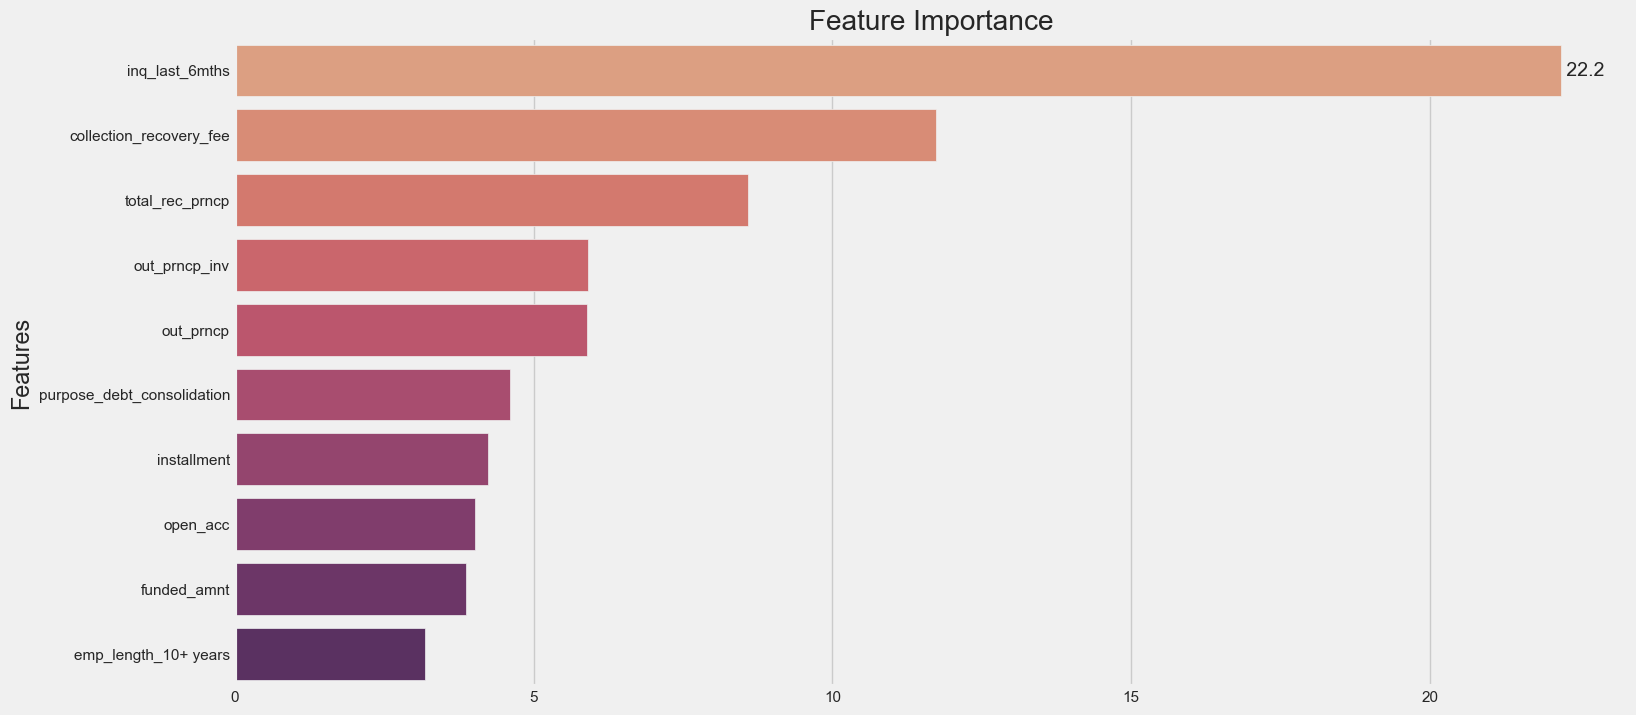

In [171]:
ax_imp_fts = sns.barplot(y='feature', x='importance',data=feature_importance, palette='flare', orient='horizontal')

plt.bar_label(ax_imp_fts.containers[0], fmt=' %.1f')
#plt.xlim(0,1.1)
plt.xlabel('')
plt.ylabel('Features')
plt.title('Feature Importance')

plt.show()

#### Insight:
- 10 column shows the highest importance value, which suggest that these columns are likely to be the highest determining factor in predicting visitor as potential buyer as the target features.
- Features in the top 10 for feature importance, as well as those outside of it, will be re-categorized into categories matching the factors used in the FICO credit scoring method, which consist of payment history, amounts owed, length of credit history, credit mix, and new credit.

In [173]:
# Categorization is based on FICO method, which consist of 5 factors.
# The selected features for each factor are determined by their definition and functionality
fico_categories = {
    'Payment History': ['delinq_2yrs','pub_rec','collections_12_mths_ex_med','total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_amnt'],
    'Amounts Owed': ['loan_amnt','funded_amnt','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv', 'total_rec_prncp','total_rec_int','revol_bal','revol_util','installment'],
    'Length of Credit History': ['open_acc','total_acc','credit_history_0-2 years','credit_history_2-5 years'],
    'Credit Mix': ['home_ownership_MORTGAGE','home_ownership_OWN','home_ownership_RENT','purpose_credit_card','purpose_debt_consolidation','purpose_home_improvement',
                   'purpose_major_purchase','purpose_small_business','purpose_other','purpose_wedding'],
    'New Credit': ['inq_last_6mths', 'purpose_moving','purpose_vacation','purpose_medical','purpose_renewable_energy','initial_list_status_w']
}

fico_weights = {
    'Payment History': 0.35,
    'Amounts Owed': 0.30,
    'Length of Credit History': 0.15,
    'Credit Mix': 0.10,
    'New Credit': 0.10
}

In [174]:
def preprocess_data(X):
    X_processed = X.copy()
    bool_cols = X_processed.select_dtypes(include='bool').columns
    X_processed[bool_cols] = X_processed[bool_cols].astype(int)
    
    num_cols = X_processed.select_dtypes(include='number').columns
    for col in num_cols:
        col_min = X_processed[col].min()
        col_max = X_processed[col].max()
        if col_max - col_min > 0:
            X_processed[col] = (X_processed[col] - col_min) / (col_max - col_min)
    
    return X_processed

X_normalized = preprocess_data(X_test_enc)

def map_to_score_with_proba(X_normalized, y_pred_proba, fico_categories, weights):
    scores = np.zeros(len(X_normalized))
    
    for category, features in fico_categories.items():
        valid_features = [feature for feature in features if feature in X_normalized.columns]
        if valid_features:
            category_scores = X_normalized[valid_features].mean(axis=1) * weights[category]
            scores += category_scores
            
    adjusted_scores = scores + y_pred_proba * 100
    
    min_score = adjusted_scores.min()
    max_score = adjusted_scores.max()
    scaled_scores = 300 + (adjusted_scores - min_score) / (max_score - min_score) * 550
    return scaled_scores.astype(int)

credit_scores_with_proba = map_to_score_with_proba(X_normalized, y_pred_proba_test_hyp, fico_categories, fico_weights)

In [175]:
credit_score_df = pd.DataFrame({'id':X_test['id'], 'credit_score':credit_scores_with_proba})

In [176]:
for index, rows in credit_score_df.iterrows():
    if rows['credit_score'] <= 579:
        credit_score_df.at[index, 'credit_score_categories'] = 'Poor (300-579)'
    elif rows['credit_score'] <= 669:
        credit_score_df.at[index, 'credit_score_categories'] = 'Fair (580-669)'
    elif rows['credit_score'] <= 739:
        credit_score_df.at[index, 'credit_score_categories'] = 'Good (670-739)'
    elif rows['credit_score'] <= 799:
        credit_score_df.at[index, 'credit_score_categories'] = 'Very good (740-799)'
    else:
        credit_score_df.at[index, 'credit_score_categories'] = 'Excellent (800-850)'

In [177]:
credit_score_df['credit_score_categories'].value_counts()

credit_score_categories
Excellent (800-850)    76849
Poor (300-579)          8874
Very good (740-799)     6111
Good (670-739)           929
Fair (580-669)           494
Name: count, dtype: int64

In [178]:
df_grp_score = credit_score_df.groupby('credit_score_categories').agg(cust_cnt=('id','count')).sort_values('cust_cnt', ascending=False)
df_grp_score.reset_index(inplace=True)

df_grp_score['percentage'] = round(df_grp_score['cust_cnt']/df_grp_score['cust_cnt'].sum()*100,2)

In [179]:
df_grp_score

credit_score_categories  cust_cnt  percentage
0     Excellent (800-850)     76849       82.41
1          Poor (300-579)      8874        9.52
2     Very good (740-799)      6111        6.55
3          Good (670-739)       929        1.00
4          Fair (580-669)       494        0.53

In [180]:
y_test.value_counts()

Target
1    82422
0    10835
Name: count, dtype: int64

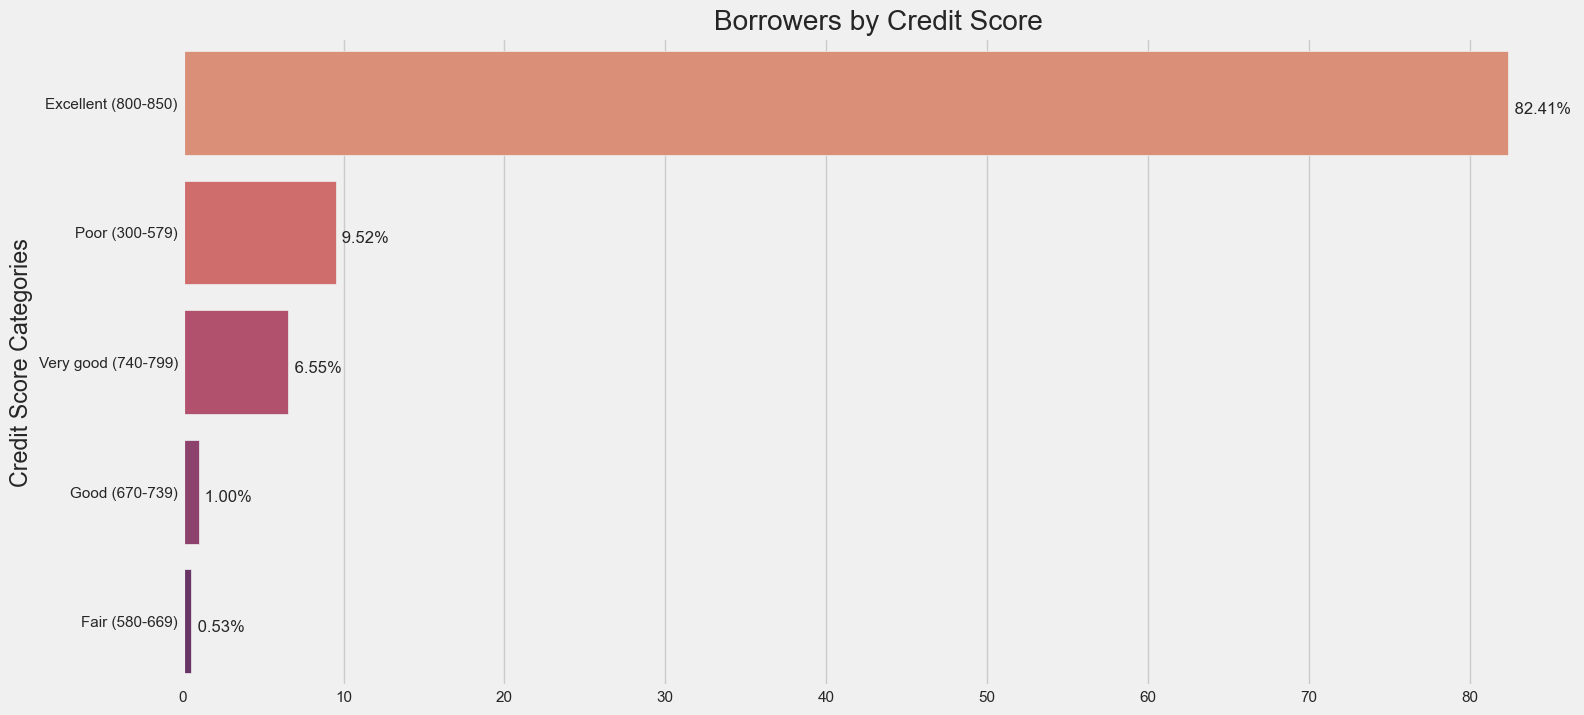

In [181]:
ax_credit_score = sns.barplot(y='credit_score_categories', x='percentage',data=df_grp_score, palette='flare', orient='horizontal')

pt.get_text_horz(ax_credit_score, 0.1, 1.8, 12, 'all')
#plt.xlim(0,1.1)
plt.xlabel('')
plt.ylabel('Credit Score Categories')
plt.title('Borrowers by Credit Score')

plt.show()

### INSIGHT:
- A significant portion of the borrower base, approximately 82%, have excellent credit scores in the range of 800 to 850. This aligns with the previous analysis of borrowers' loan status distribution, which shows that nearly 90% of all borrowers have good loans and mostly have either low interest rates or long credit histories, indicating that these borrowers are at the higher end of creditworthiness.
- Borrowers with poor credit scores, in the range of 300 to 579, constitute the second-highest category, comprising more than 9% of the borrower base. This suggests that the company has employed an effective risk assessment methodology, as evidenced by the fact that, despite nearly 10% of borrowers having poor credit scores, the original distribution still shows a large portion of borrowers with good loans.
- Borrower whose credit score in fair, good, and very good make up the minority of the borrower base with the combine percentage of around 8%. this suggest that there might be untapped potential in expanding services to borrowers in the fair to very good credit range, which could diversify the portfolio further.

In [183]:
def text_warn(x_val, y_val, text='This loan is risky'):
    plt.text(x=x_val, y=y_val, s=text, 
    fontsize=16, color='red',va='center',weight='bold')

def line_range(x_val_start, x_val_end, area_range_val):
    plt.axvline(x= x_val_start, ls='--', color='red')
    plt.axvline(x= x_val_end, ls='--', color='red')
    plt.stackplot(np.arange(area_range_val[0], area_range_val[1]),[[25000]], color='red', alpha=0.1)

In [184]:
credit_score_order = ['Poor (300-579)','Fair (580-669)','Good (670-739)','Very good (740-799)','Excellent (800-850)']

In [185]:
def visualize_performance(df, feature_start, feature_end, linex, liney, linelist, textx, texty,*args):
    from matplotlib import style
    
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize = (20, 12))
    
    #plot data
    sns.barplot(data = df, x=feature_end, 
                y='bad_loan_rate', hue='credit_score_categories', 
                hue_order=credit_score_order, orient='v', palette='OrRd', ci=None)
    
    #axvline1
    line_range(linex, liney, [linelist[0],linelist[1]])
    text_warn(textx, texty)

    for func in args:
        func()
    
    avg_bad_val = df[df['credit_score_categories']=='Poor (300-579)']['bad_loan_rate'].mean()
    max_bad_val_lim = round(df[df['credit_score_categories']=='Poor (300-579)']['bad_loan_rate'].max()+3)
    
    plt.axhline(avg_bad_val, color='#F7CA77', linestyle='--', linewidth=2, label=f'Average bad loan rate (Poor): {round(avg_bad_val, 2)}%')
    plt.ylim(0,max_bad_val_lim)
    
    if feature_start == 'loan_amnt':
        feature_measure = 'Loan Amount'
        
    else:
        feature_measure = 'Interest Rate'
    
    #title
    plt.title(f"Bad Loan Rate on {feature_measure} \nBased on Borrower's Score Status",
              fontsize=18, weight ='extra bold')
    
    #show percentage
    plt.bar_label(ax.containers[0], fmt='%.1f%%')
    plt.bar_label(ax.containers[1], fmt='%.1f%%', fontsize=10)
    plt.bar_label(ax.containers[2], fmt='%.1f%%', fontsize=10)
    plt.bar_label(ax.containers[3], fmt='%.1f%%', fontsize=10)
    plt.bar_label(ax.containers[4], fmt='%.1f%%', fontsize=10)
    
    #label axis
    plt.xlabel(feature_measure, fontsize=14)
    plt.ylabel('Bad Loan Rate (%)', fontsize=14)
    
    #legend
    plt.legend(title='Status', loc='upper right')
    plt.show()

In [186]:
def bad_loan_rate(target_feature, feature_end):
    df_cust = credit_score_df.groupby(['credit_score_categories',target_feature,feature_end]).agg(num_cust= ('id','count')).reset_index()
    df_total_cust = credit_score_df.groupby(feature_end).agg(total_cust = ('id','count')).reset_index()

    df_loan_group = df_cust.merge(df_total_cust, on=feature_end, how='inner')
    
    df_bad_loan = df_loan_group[df_loan_group[target_feature] == 'Bad loan']
    df_bad_loan['bad_loan_rate'] = round((df_bad_loan['num_cust'] / df_bad_loan['total_cust'])*100, 2)
    df_bad_loan = df_bad_loan.sort_values('bad_loan_rate', ascending=False)

    return df_bad_loan
    
df_check_range = pd.DataFrame()
def credit_performance(feature_start, feature_end, linex, liney, linelist, textx, texty, *args):
    val_max = X_test[feature_start].max()
    val_min = X_test[feature_start].min()
    
    credit_score_df[feature_end] = pd.cut(X_test[feature_start], bins=np.linspace(val_min, val_max, num=11), precision=2, include_lowest=True)
    credit_score_df[feature_end] = credit_score_df[feature_end].astype(str).str.replace('[(\]]', '', regex=True).str.replace(',', ' -')

    features_list = [val for val in credit_score_df]
    target_feature = 'loan_status'
    
    if target_feature not in features_list:
        credit_score_df['loan_status'] = y_test.apply(lambda x: 'Good loan' if x==1 else 'Bad loan')

    df_check_range = pd.DataFrame({feature_end:credit_score_df[feature_end].unique()})

    df_bad_loan_rate = bad_loan_rate(target_feature, feature_end)

    visualize_performance(df_bad_loan_rate, feature_start, feature_end, linex, liney, linelist, textx, texty,*args)

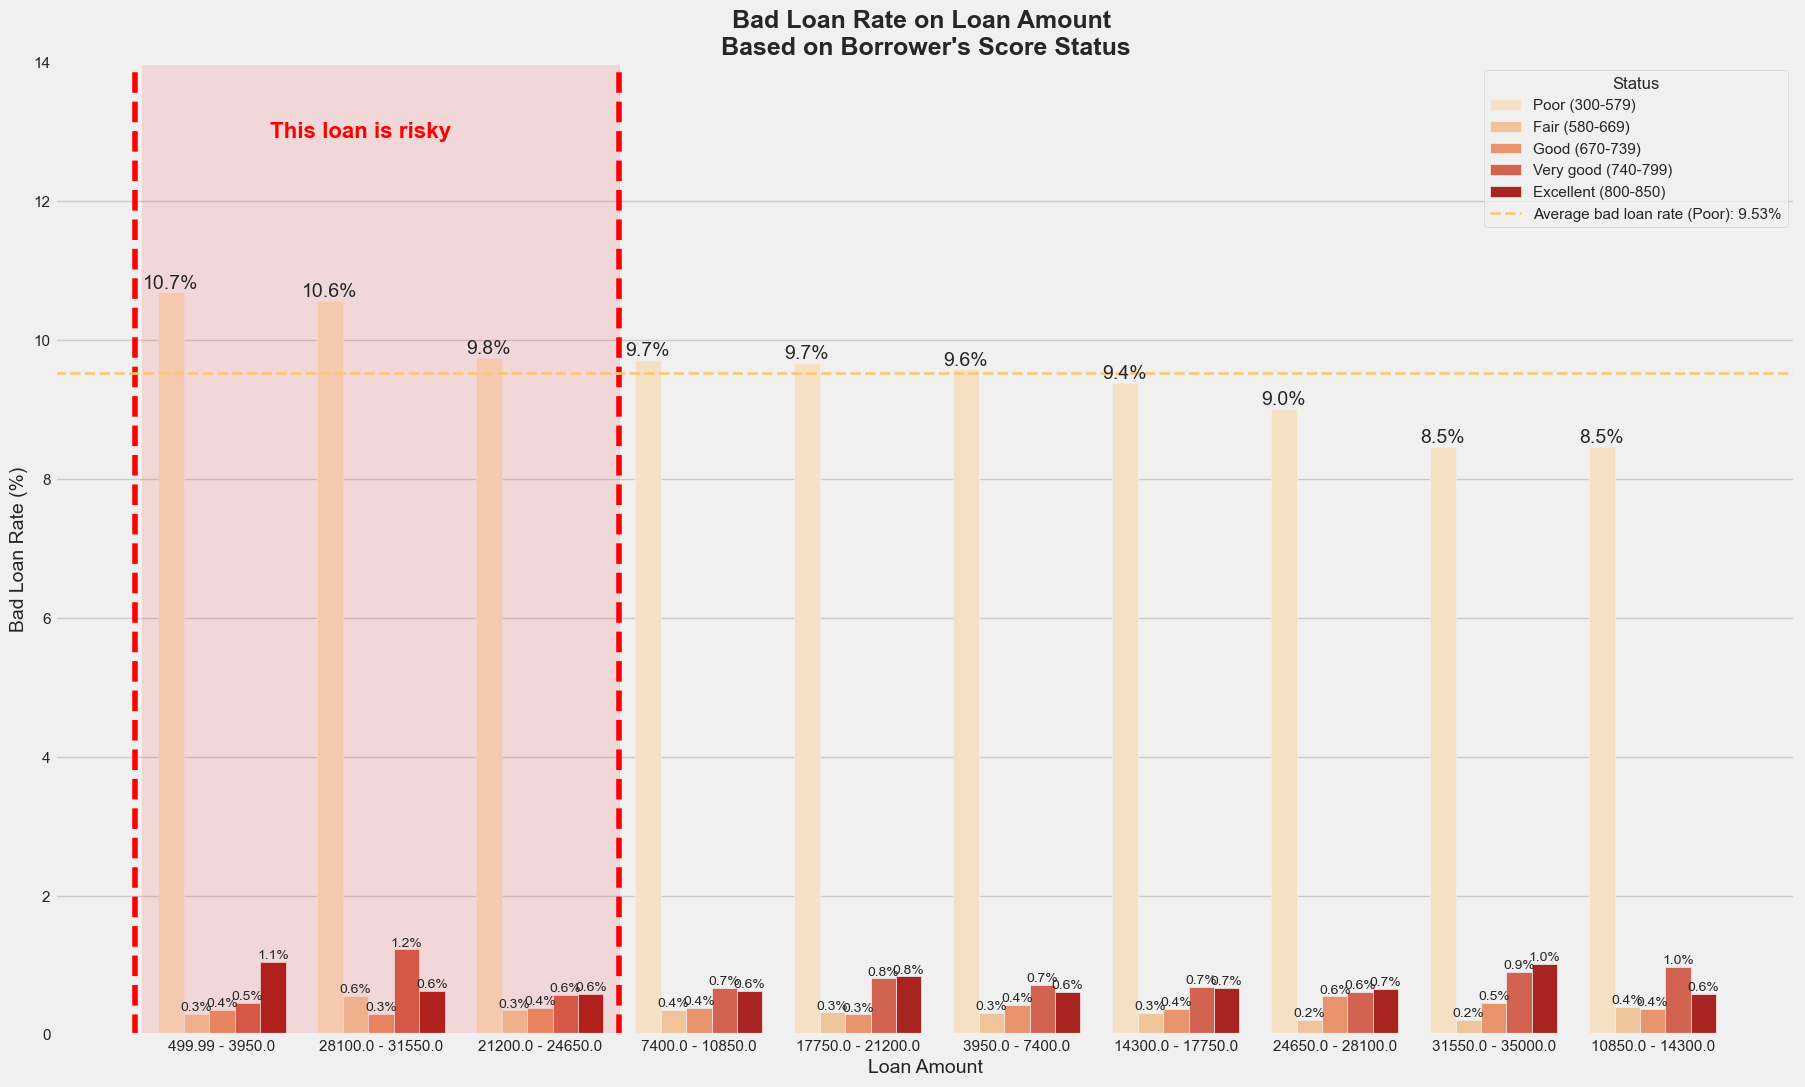

In [187]:
credit_performance('loan_amnt', 'loan_ammount_range', -0.55, 2.5, [-0.5,3.5], 0.3, 13)

### INSIGHT:
- Borrowers whose loan amounts are at either the lowest or at the higher ends tend to consist of a high percentage of borrowers with poor credit scores, averaging around 10%. In addition, the small percentage of borrowers with good or better credit scores makes loans at these amounts risky and potentially more likely to result in a higher number of bad loan cases.
- Loan amounts at the lower to middle ranges (7,400 to 21,200) have a slightly lower percentage of borrowers with poor credit scores, averaging around 9%. Loans in this range also have a relatively low percentage of borrowers with good or better credit scores, which is stable and averages around 0.9% for each category. While these loans are comparably less risky than those in the previous range, the high presence of borrowers with poor credit scores suggests a need for stricter creditworthiness assessments for applicants.
- Loan amounts ranging from 10,850 to 14,300 and from 31,550 to 35,000 have the lowest percentages of borrowers with poor credit scores, while also having a relatively fair number of borrowers with good or better credit scores compared to other loan amount ranges. This suggests that loans in these amounts might be less risky and have a lower chance of resulting in bad loans.

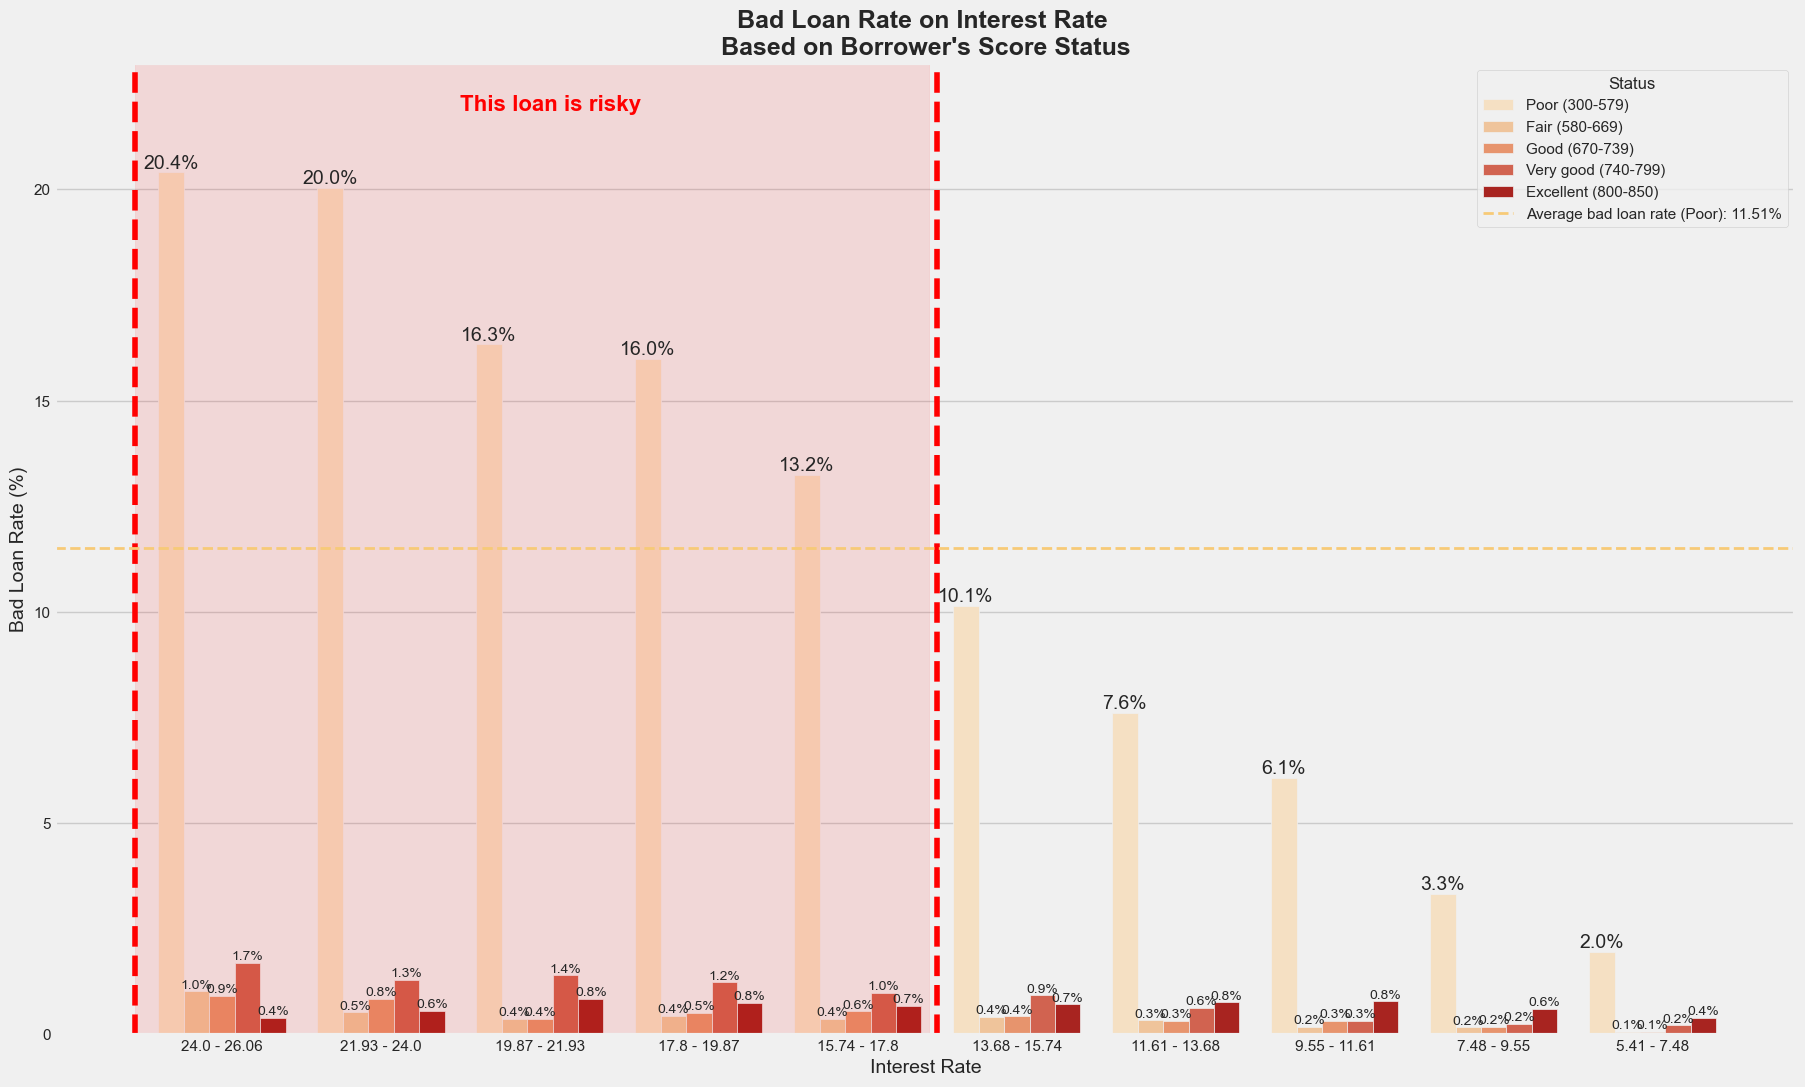

In [189]:
credit_performance('int_rate', 'int_rate_range', -0.55, 4.5, [-0.55,5], 1.5, 22)

### INSIGHT:
- Interest rates ranging from 15.74% to 26.06% are the riskiest due to their very high percentage of borrowers with poor credit scores, reaching up to 20.4% of the total borrower base. This indicates that borrowers within this interest rate range have a high likelihood of resulting in bad loans and should either be strictly monitored or reconsidered for loan approval. The high percentage of borrowers with poor credit scores, compared to those with low to middle interest rates, also supports previous analyses showing that as interest rates increase, so does the probability of loans resulting in bad loan status.
- There is a consistent trend showing that borrowers with at least a fair credit score, up to those with excellent credit scores, are less likely to result in bad loans. This suggests that encouraging borrowers to improve their creditworthiness to at least a fair credit score will significantly decrease the likelihood of loans experiencing difficulties that could potentially lead to default. It also suggests that prioritizing loan approval for those with at least fair credit scores may be more beneficial, as they present less risk, and might reduce potential losses.

## Business recommendation

- **Tighten Approval Criteria for Poor Credit Scores**, Based on the information gathered about the borrower as a loan applicant, the company can implement stricter approval criteria if the applicant is found to have a poor credit score or low creditworthiness. Depending on the decision, the company may also consider requiring additional collateral or co-signers for these high-risk applicants.
- **Credit Improvement Program**, The company could offer a program to help borrowers improve their credit scores, which could include financial education in the form of resources on credit management. Additionally, the company could provide a credit monitoring and improvement tool for customers (web or mobile application), helping them monitor and stay updated on changes to their credit.
- **Early Warning System**, The company could develop a system to identify early signs of potential default among borrowers with poor credit scores, based on either the borrowers' credit scores or factors affecting them, such as their credit behavior (utilization, frequent loan applications) or their overall financial health (cash flow, debt-to-income ratio). Based on this, the company could then implement a proactive interventions for at-risk borrowers, such as payment plans or loan restructuring.
- **Portfolio Rebalancing**, By adjusting the approval criteria, the company should gradually shift the loan portfolio toward a higher proportion of borrowers with fair or better credit scores, focusing efforts on reducing the percentage of poor credit score borrowers over time.
- **Incentives**, Based on the results of the improvement program and the borrowers' progress over time after participating in the program, the company could offer incentives, such as interest rate reductions, to borrowers who actually improve their credit scores.
